In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from math import *
import matplotlib.pyplot as plt
import random

I – Densités risque neutre

Question 1 - Sur les prix d’option données dans le tableau ci-après, calibrer une densité risque neutre en utilisant la formule de Breeden-Litzenberger et la technique de Shimko. Comparer avec une densité gaussienne.

In [ ]:
data = {'Strike':[95,96,97,98,99,100,101,102,103,104],
        'Prix': [10.93,9.55,8.28,7.40,6.86,6.58,6.52,6.49,6.47,6.46]}

df = pd.DataFrame(data)
print(df)

def BlackScholes(S,K,r,T,sigma):
    d1 = (log(S/K)+(r+sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    N_prime = norm.pdf
    value = S*norm.cdf(d1,loc=0,scale = 1) - K*exp(-r*T)*norm.cdf(d2,loc=0,scale = 1)
    delta = norm.cdf(d1,0,1)
    vega=S * N_prime(d1) * np.sqrt(1)
    return value, vega

L_BS = []
for i in range(len(df)):
    K = df['Strike'][i]
    r = 0
    T = 1
    sigma = 0.2
    BS_Prix = BlackScholes(100,K,r,T,sigma)[0]
    L_BS.append(BS_Prix)

df['BS Prix'] = pd.Series(L_BS)


def implied_volatility_call(C, S, K, T, r, tol=10e-10, max_iterations=1000):

    sigma = np.sqrt(2 * np.pi / (T)) * C / S #initial guess formula from a paper of Brenner & Subrahmanyam (1988)
    diff=20 #Define a random value > tol for the initialization
    nb_iterations=0

    while abs(diff) > tol and nb_iterations < max_iterations:

      BS_call, vega = BlackScholes(S, K, r, T, sigma)
      diff = BS_call - C
      sigma = sigma - diff / vega

      nb_iterations=nb_iterations+1

    return sigma

L_Vol = []
for j in range(len(df)):
    K = df['Strike'][j]
    C = df['Prix'][j]
    r = 0
    T = 1
    vol = implied_volatility_call(C,100,K,T,r)
    L_Vol.append(vol)

df['Volatilité'] = pd.Series(L_Vol)

print(df)


   Strike   Prix
0      95  10.93
1      96   9.55
2      97   8.28
3      98   7.40
4      99   6.86
5     100   6.58
6     101   6.52
7     102   6.49
8     103   6.47
9     104   6.46
   Strike   Prix    BS Prix  Volatilité
0      95  10.93  10.519541    0.210948
1      96   9.55   9.967734    0.189023
2      97   8.28   9.436589    0.170031
3      98   7.40   8.925975    0.160956
4      99   6.86   8.435711    0.160079
5     100   6.58   7.965567    0.165124
6     101   6.52   7.515268    0.175031
7     102   6.49   7.084494    0.185098
8     103   6.47   6.672890    0.194908
9     104   6.46   6.280064    0.204530


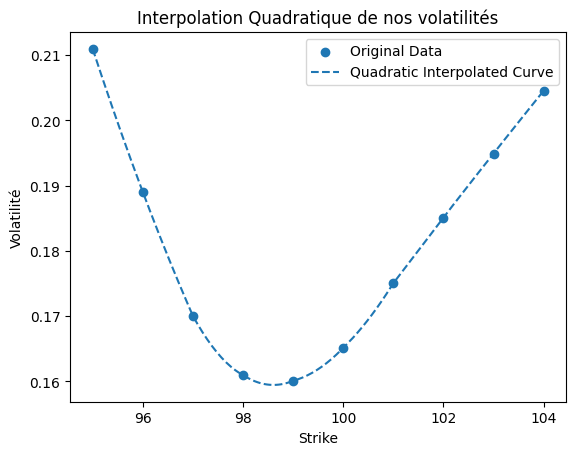

In [ ]:
def quadratic_interpolation(x_interpolated, x_original, y_original):
    y_interpolated = []

    for x in x_interpolated:
        for i in range(len(x_original) - 2):
            if x_original[i] <= x <= x_original[i + 2]:
                x1, x2, x3 = x_original[i], x_original[i + 1], x_original[i + 2]
                y1, y2, y3 = y_original[i], y_original[i + 1], y_original[i + 2]
                break

        denom = (x1 - x2) * (x1 - x3) * (x2 - x3)
        a = (x3 * (y2 - y1) + x2 * (y1 - y3) + x1 * (y3 - y2)) / denom
        b = (x3**2 * (y1 - y2) + x2**2 * (y3 - y1) + x1**2 * (y2 - y3)) / denom
        c = (x2 * x3 * (x2 - x3) * y1 + x3 * x1 * (x3 - x1) * y2 + x1 * x2 * (x1 - x2) * y3) / denom

        y = a * x**2 + b * x + c
        y_interpolated.append(y)

    return y_interpolated

x_original = np.array(df["Strike"])
y_original = np.array(df["Volatilité"])

nb_pts = 190
x_interpolated = np.linspace(x_original.min(), x_original.max(), nb_pts)
y_interpolated =quadratic_interpolation(x_interpolated, x_original, y_original)

# Plotting
plt.scatter(x_original, y_original, label='Original Data')
plt.plot(x_interpolated, y_interpolated, label='Quadratic Interpolated Curve', linestyle='--')
plt.legend()
plt.xlabel('Strike')
plt.ylabel('Volatilité')
plt.title('Interpolation Quadratique de nos volatilités')
plt.show()


In [ ]:
df2 = pd.DataFrame()
df2['x'] = pd.Series(x_interpolated)
df2['y'] = pd.Series(y_interpolated)
print(df2)

              x         y
0     95.000000  0.210948
1     95.047619  0.209837
2     95.095238  0.208733
3     95.142857  0.207636
4     95.190476  0.206546
..          ...       ...
185  103.809524  0.202711
186  103.857143  0.203167
187  103.904762  0.203621
188  103.952381  0.204076
189  104.000000  0.204530

[190 rows x 2 columns]


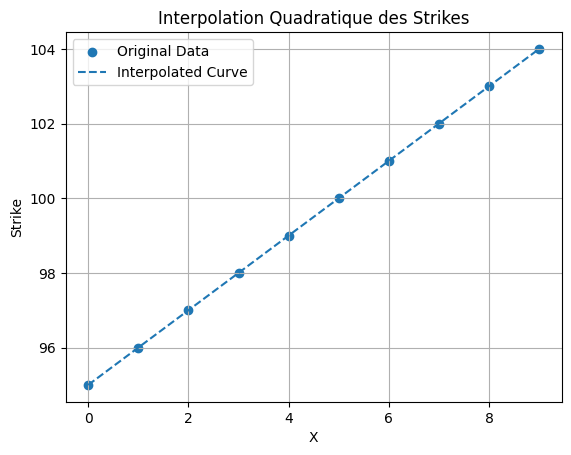

            x  Strikes Interpolés
0    0.000000           95.000000
1    0.047619           95.047619
2    0.095238           95.095238
3    0.142857           95.142857
4    0.190476           95.190476
..        ...                 ...
185  8.809524          103.809524
186  8.857143          103.857143
187  8.904762          103.904762
188  8.952381          103.952381
189  9.000000          104.000000

[190 rows x 2 columns]


In [ ]:
#interpolation of strikes

x_original=df.index
y_original=df["Strike"]
nb_pts=190
x_interpolated=np.linspace(x_original.min(), x_original.max(), nb_pts)
strike_interpolated = quadratic_interpolation(x_interpolated, x_original, y_original)

plt.scatter(x_original, y_original, label='Original Data')
plt.plot(x_interpolated, strike_interpolated, label='Interpolated Curve', linestyle='--')
plt.legend()
plt.xlabel('X')
plt.ylabel('Strike')
plt.title('Interpolation Quadratique des Strikes')
plt.grid()
plt.show()


df3 = pd.DataFrame()
df3['x'] = pd.Series(x_interpolated)
df3['Strikes Interpolés'] = pd.Series(strike_interpolated)
print(df3)

In [ ]:
l_call=[]
for i in range(len(df2['x'])):
  call_tmp,vega_tmp=BlackScholes(100, df3['Strikes Interpolés'][i],0,1,df2['y'][i])
  l_call.append(call_tmp)

call_extrapolation=pd.DataFrame()
call_extrapolation['Strike'] = pd.Series(strike_interpolated)
call_extrapolation['call']=l_call
call_extrapolation

,Strike,call
0,95.000000,10.930000
1,95.047619,10.861884
2,95.095238,10.794004
3,95.142857,10.726362
4,95.190476,10.658956
...,...,...
185,103.809524,6.461242
186,103.857143,6.460904
187,103.904762,6.460585
188,103.952381,6.460284


Text(0.5, 1.0, 'Risk-neutral PDF')

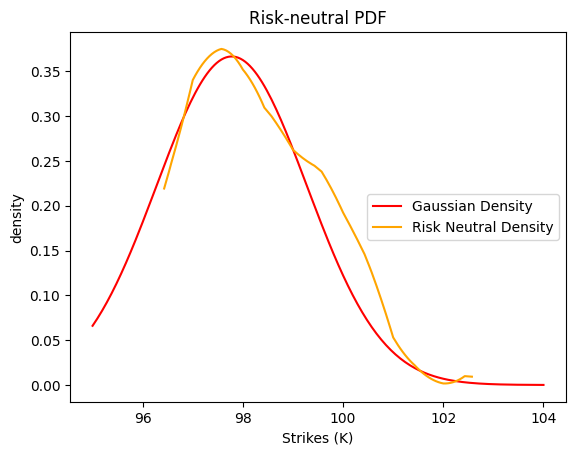

In [ ]:
test=pd.DataFrame()
test["Strike"] = pd.Series(strike_interpolated)
# On utilise la formule de Breeden-Litzenberger avec r = 0
test['t'] = (-2 * call_extrapolation['call'] +
                       call_extrapolation['call'].shift(30) +
                       call_extrapolation['call'].shift(-30)) / (30/21)**2    #Le 1/21 correspond au variation de Strike pour un shift de 1
                                                                            #Cependant le test est extrèmement sensible aux variations rapides du marché
                                                                            #(les pics correspondent aux strikes 95, 96, ..., 103, 104 forcément variation plus grande)

mean, std_dev = np.mean(df3['Strikes Interpolés']), np.std(df3['Strikes Interpolés'])
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, nb_pts)

fig = plt.figure()
ax = fig.add_subplot(111)

densi_Gauss = norm.pdf(x, mean -3 , std_dev)
densi_Gauss_2=densi_Gauss*2.4
plt.plot(df3['Strikes Interpolés'],densi_Gauss_2 , label='Gaussian Density', color='red')
plt.plot(df3['Strikes Interpolés'], test['t'], label='Risk Neutral Density', color='orange')
ax.legend(loc="center right")
plt.xlabel('Strikes (K)')
plt.ylabel('density')
plt.title('Risk-neutral PDF')

Text(0.5, 1.0, 'Risk-neutral PDF')

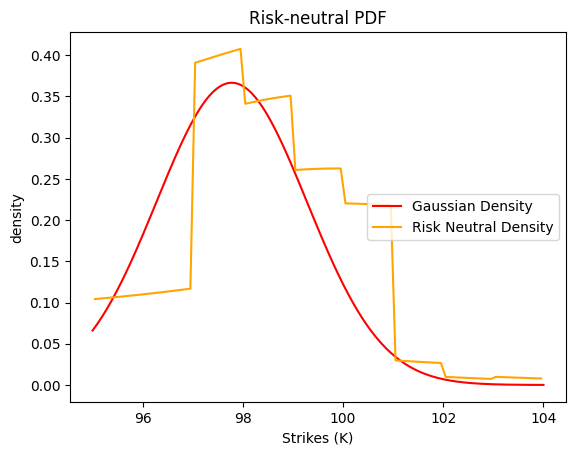

In [ ]:
#En enlevant les strikes cités précedemment :

fig = plt.figure()
ax = fig.add_subplot(111)
test2 = test.copy()
strike_a_drop = [96, 97, 98, 99, 100, 101, 102, 103]
test2 = test2[~test2['Strike'].isin(strike_a_drop)]
plt.plot(df3['Strikes Interpolés'],densi_Gauss_2 , label='Gaussian Density', color='red')
plt.plot(test2["Strike"], test2['t'], label='Risk Neutral Density', color='orange')
ax.legend(loc="center right")
plt.xlabel('Strikes (K)')
plt.ylabel('density')
plt.title('Risk-neutral PDF')

In [ ]:
df4 = pd.DataFrame()
Gaussian_density=pd.DataFrame()
Gaussian_density['density']=densi_Gauss_2
test_ratio=pd.DataFrame()
ratio=[]
mean_val=[]

mean_val=abs((Gaussian_density.iloc[1:-1,0]- test['t'].dropna())).max()
mean_val

test_ratio['Mean']=pd.Series(mean_val)
df_min = float(test_ratio['Mean'].min())
test_ratio[test_ratio['Mean'] == df_min]

,Mean
0,0.071958


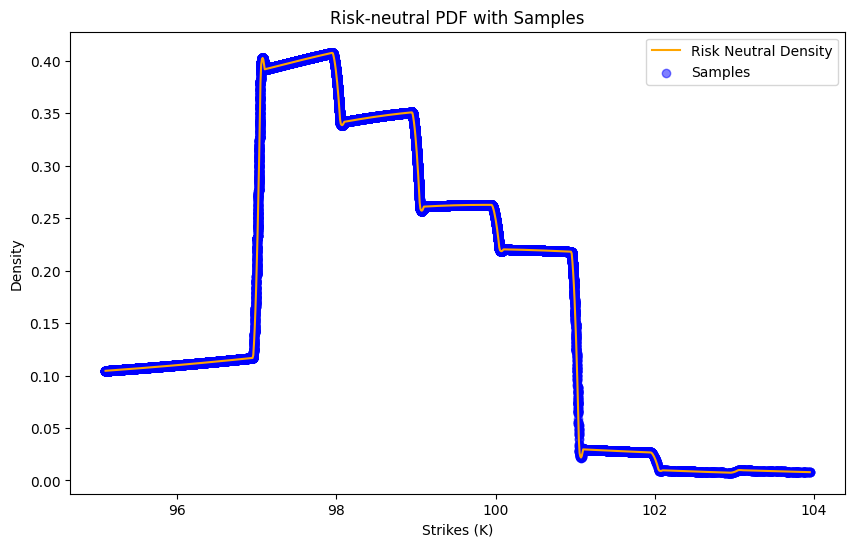

In [ ]:
# Calculer la moyenne et l'écart-type pour la densité gaussienne
mean, std_dev = np.mean(df3['Strikes Interpolés']), np.std(df3['Strikes Interpolés'])
nb_pts = len(df3['Strikes Interpolés'])
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, nb_pts)

def densite_risque_neutre(strikes, densites, strike):
    if strike < strikes[0] or strike > strikes[-1]:
        return 0.0
    else:
        return quadratic_interpolation([strike], strikes, densites)[0]

#Box muller nous servira pour générer des nombres aléatoires qui suivent une distribution normale
#On l'utilisera dans Metropolis Hastings pour Proposer de Nouveaux Échantillons

def box_muller():
    u1, u2 = np.random.rand(2)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    return z0

def metropolis_hastings(densite_objectif_func, sample_ini, steps, larg_prop, strikes, densites):
    sample_actuel = sample_ini
    samples = [sample_actuel]

    for i in range(steps):
        proposition = sample_actuel + box_muller() * larg_prop      #nouveau point (proposition) généré en déplaçant le point actuel
        densite_objectif_actuelle = densite_objectif_func(strikes, densites, sample_actuel)   #densité de probabilité au point actuel
        densite_objectif_proposee = densite_objectif_func(strikes, densites, proposition)   #densité de probabilité au nouveau point proposé

        ratio_acceptation = 0       #détermine la probabilité d'accepter le nouveau point proposé
        if densite_objectif_actuelle > 0:
            ratio_acceptation = densite_objectif_proposee / densite_objectif_actuelle   #Si la densité proposée est plus élevée que l'actuelle, le ratio sera supérieur à 1, et le nouveau point sera accepté.
                                                                                        #Si la densité proposée est plus faible, il y a une chance que le point soit toujours accepté, donnant à l'algorithme
                                                                                        #la capacité d'explorer tout l'espace des échantillons, y compris les zones de faible probabilité
        if np.random.rand() < ratio_acceptation:        #Un nombre aléatoire uniforme entre 0 et 1 est généré. Si ce nombre est inférieur au ratio d'acceptation, le nouveau point proposé est accepté et devient le sample_actuel.
            sample_actuel = proposition

        samples.append(sample_actuel)

    return samples

# Utiliser l'algorithme Metropolis-Hastings pour échantillonner des valeurs
# en fonction de la densité risque-neutre interpolée
initial_strike = df3['Strikes Interpolés'].median()  # Un point de départ pour l'échantillonnage
steps = 100000  # Nombre d'échantillons à générer
largeur_propo = std_dev * 0.1  # Largeur de la proposition basée sur la volatilité des strikes
strikes = np.array(test2['Strike'])
densites = np.array(test2['t'])

# Générer des échantillons à partir de la densité risque-neutre
samples = metropolis_hastings(densite_risque_neutre, initial_strike, steps, largeur_propo, strikes, densites)

# Tracer la densité risque-neutre
x_range = np.linspace(min(strikes), max(strikes), 1000)
y_interp = quadratic_interpolation(x_range, strikes, densites)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_interp, label='Risk Neutral Density', color='orange')

# Tracer les échantillons sur le même graphique
plt.scatter(samples, [densite_risque_neutre(strikes, densites, s) for s in samples], color='blue', alpha=0.5, label='Samples')

plt.title('Risk-neutral PDF with Samples')
plt.xlabel('Strikes (K)')
plt.ylabel('Density')
plt.legend()
plt.show()


En résumé, l'algorithme Metropolis-Hastings est un processus itératif qui génère une chaîne de points. Cette chaîne est construite de manière à ce que sa distribution converge vers la distribution cible, nous permettant ainsi d'obtenir un échantillon de cette dernière même lorsque l'échantillonnage direct est intractable.

In [ ]:
discount_factor = np.exp(-r * T) #Dans notre cas 0
L_Price = []
df_Price_RN = pd.DataFrame()
for k in data['Strike'] :
  call_payoffs = [max(sample - k, 0) for sample in samples]
  # Estimer le prix de l'option call
  call_option_price = np.mean(call_payoffs)     #On définit le prix de l'option comme la moyenne des payoffs actualisés
  L_Price.append(call_option_price)

df_Price_RN['Strike'] = data['Strike']
df_Price_RN['Prix Option'] = pd.Series(L_Price)
df_Price_RN

,Strike,Prix Option
0,95,3.433017
1,96,2.464124
2,97,1.573112
3,98,0.854293
4,99,0.388572
5,100,0.127627
6,101,0.027363
7,102,0.008977
8,103,0.001923
9,104,0.000000


# Partie 2

#Q.3

In [ ]:
mat_12M=[10.93,9.55,8.28,7.40,6.86,6.58,6.52,6.49,6.47,6.46]
mat_9M = [11.79 ,8.95 ,8.07 ,7.03 ,6.18 ,6.04 ,5.76 ,5.50 ,5.50 ,5.39]
mat_6M = [10.71 ,8.28 ,6.91 ,6.36 ,5.29 ,5.07 ,4.76 ,4.47 ,4.35 ,4.14]
mat_3M = [8.67 ,7.14 ,5.98 ,4.93 ,4.09 ,3.99 ,3.43 ,3.01 ,2.72 ,2.53]

strike=data['Strike']

data_9M = pd.DataFrame()
data_9M['Strike'] = data['Strike']
data_9M['Prix'] = pd.Series(mat_9M)
data_6M = pd.DataFrame()
data_6M['Strike'] = data['Strike']
data_6M['Prix'] = pd.Series(mat_6M)
data_3M = pd.DataFrame()
data_3M['Strike'] = data['Strike']
data_3M['Prix'] = pd.Series(mat_3M)

In [ ]:
def vol_imp(St, L_mat, L_Strike, Mat):

  vol_imp=[]
  ratio = Mat/12
  for i in range(len(L_mat)):
    vol_imp.append(implied_volatility_call(L_mat[i], St, L_Strike[i], ratio, r, tol=0.000001,max_iterations=100))

  return vol_imp

In [ ]:
def plot_nappe(L_strike, L_Ratio, Z):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  X, Y = np.meshgrid(L_strike, L_ratio)
  ax.plot_surface(X, Y, Z,cmap='viridis')
  ax.set_xlabel('Strike'), ax.set_ylabel('Maturité'), ax.set_zlabel('Volatilit implicite')
  plt.show()
  plt.close(fig)
  return

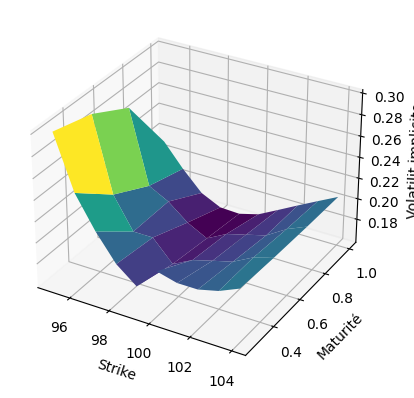

None


In [ ]:
vol_imp_12M = vol_imp(100, mat_12M, strike, 12)
vol_imp_9M = vol_imp(100, mat_9M, strike, 9)
vol_imp_6M = vol_imp(100, mat_6M, strike, 6)
vol_imp_3M = vol_imp(100, mat_3M, strike, 3)
Z1 = np.array([vol_imp_3M, vol_imp_6M, vol_imp_9M, vol_imp_12M])
L_ratio = [0.25, 0.5, 0.75, 1]

print(plot_nappe(strike, L_ratio, Z1))

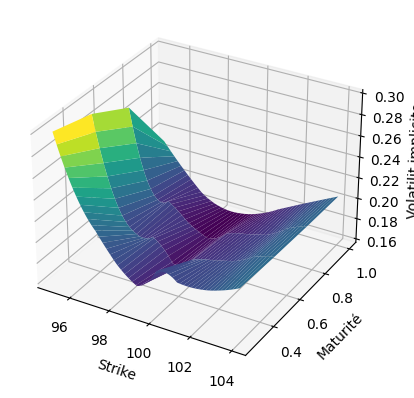

None


In [ ]:
nb_pts=1900
strike_interpolated=np.linspace(95, 104, nb_pts)

interpol_call_12M=quadratic_interpolation(strike_interpolated, strike, mat_12M)
interpol_call_9M=quadratic_interpolation(strike_interpolated, strike, mat_9M)
interpol_call_6M=quadratic_interpolation(strike_interpolated, strike, mat_6M)
interpol_call_3M=quadratic_interpolation(strike_interpolated, strike, mat_3M)

vol_imp_12M_interpol = vol_imp(100, interpol_call_12M, strike_interpolated, 12)
vol_imp_9M_interpol = vol_imp(100, interpol_call_9M, strike_interpolated, 9)
vol_imp_6M_interpol = vol_imp(100, interpol_call_6M, strike_interpolated, 6)
vol_imp_3M_interpol = vol_imp(100, interpol_call_3M, strike_interpolated, 3)
Z2 = np.array([vol_imp_3M_interpol, vol_imp_6M_interpol, vol_imp_9M_interpol, vol_imp_12M_interpol])

print(plot_nappe(strike_interpolated, [0.25, 0.5, 0.75, 1], Z2))

In [ ]:
index=np.abs(strike_interpolated - 99.5).argmin()

In [ ]:
strike_995=strike_interpolated[index]
vol_12M_995=vol_imp_12M_interpol[index]
vol_9M_995=vol_imp_9M_interpol[index]
vol_6M_995=vol_imp_6M_interpol[index]
vol_3M_995=vol_imp_3M_interpol[index]

vol_995=[vol_3M_995,vol_6M_995,vol_9M_995,vol_12M_995]
mat=[3,6,9,12]

mat_2=[3,4,5,6,7,8,9,10,11,12]
vol_995_inter=quadratic_interpolation(mat_2,mat,vol_995)

df_vol_995 = pd.DataFrame()
df_vol_995['Maturité'] = pd.Series(mat_2)
df_vol_995['Volatilité'] = pd.Series(vol_995_inter)
df_vol_995

,Maturité,Volatilité
0,3,0.185608
1,4,0.179713
2,5,0.174969
3,6,0.171376
4,7,0.168933
5,8,0.167641
6,9,0.167500
7,10,0.165817
8,11,0.163938
9,12,0.161863


In [ ]:
prix_call_strike_995=BlackScholes(100,99.5,r,8/12,df_vol_995.iloc[5,1])[0]
prix_call_strike_995

5.696406265009088

Pour une option de Strike 99.5 et de maturité 8M, nous obtenons un prix d'environ 5.70 (à 10^-2 près). Cette valeur nous semble cohérente aux vues des prix connus. En effet, nous observons que pour un strike de 99 l'option vaut
5.29 (6M) / 6.18 (9M) et 5.07 (6M) / 6.04 (9M) pour un strike de 100. Notre prédiction appartient bien à l'intervalle [5.29 ; 6.04] obtenu en prenant
(max(Prix 6M) ; min(Prix 9M)).

#Q.4  Calibrer un modèle à volatilité locale de type SVI

#SVI par Monte Carlo

On crée tout d'abord une fonction Nelder Mead qui nous permettra par la suite de trouver les valeurs idéales pour nos différents paramètres a, b, m, rho, sigma utilisés dans notre SVI.

In [ ]:
def nelder_mead(fonction, initial_guess, *args, step=[0.01,0.005,0.001,0.0005,0.0001], no_improve_thr=1e-12, no_improv_break=10, max_iter=1000000000000):
# Initialization
  dimension = len(initial_guess)
  first_value = fonction(initial_guess, *args)

  no_improvement_iteration_nb = 0
  list_score_and_params = []
  list_score_and_params.append([first_value, initial_guess])

  # Create other vectors to have dimension + 1 vectors
  for i in range(1, dimension + 1):
      new_vector = [x + random.uniform( -step[i - 1], step[i - 1]) for x in initial_guess]
      value_new_vector = fonction(new_vector, *args)
      list_score_and_params.append([value_new_vector, new_vector])

  nb_iteration = 0
  no_improvement_nb = 0

  list_score_and_params = sorted(list_score_and_params, key=lambda x: x[0])
  previous_best = list_score_and_params[0][0]

  while no_improvement_nb <= no_improv_break and nb_iteration <= max_iter:
      # while the stopping condition isn't reached run the loop
      best = list_score_and_params[0][0]

      if best < previous_best - no_improve_thr:
          no_improvement_nb = 0
          previous_best = best
      else:
          no_improvement_nb = no_improvement_nb + 1

      # Reflexion
      matrix = np.vstack((list_score_and_params[x][1] for x in range(0, dimension + 1)))
      x0 = np.mean(matrix, axis=0)
      xr = x0 + (x0 - list_score_and_params[dimension][1])
      value_xr = fonction(xr, *args)

      # stretching
      if value_xr < list_score_and_params[0][0]:
          xe = x0 + 2 * (x0 - list_score_and_params[dimension][1])
          value_xe = fonction(xe, *args)
          if value_xe < value_xr:
              list_score_and_params[dimension] = [value_xe, xe]

              nb_iteration = nb_iteration + 1


          else:
              list_score_and_params[dimension] = [value_xr, xr]

              nb_iteration = nb_iteration + 1

      else:
          # Reflexion conservation
          if value_xr < list_score_and_params[dimension - 1][0]:
              list_score_and_params[dimension] = [value_xr, xr]

              nb_iteration = nb_iteration + 1

          else:
              # Contraction
              if value_xr >= list_score_and_params[dimension - 1][0]:
                  # Internal contraction
                  if list_score_and_params[dimension - 1][0] <= value_xr <= list_score_and_params[dimension][0]:
                      xc = 1 / 2 * (x0 + xr)
                      value_xc = fonction(xc, *args)
                      if value_xc <= value_xr:
                          list_score_and_params[dimension] = [value_xc, xc]

                          nb_iteration = nb_iteration + 1

              else:
                  # External contraction
                  if value_xr >= list_score_and_params[dimension][0]:
                      xc = 1 / 2 * (x0 + list_score_and_params[dimension][1])
                      value_xc = fonction(xc, *args)
                      if value_xc <= list_score_and_params[dimension][0]:
                          list_score_and_params[dimension] = [value_xc, xc]

                          nb_iteration = nb_iteration + 1

                  else:
                      # Contraction to x1
                      for k in range(1, dimension + 1):
                          x_tmp = [x + y for x, y in zip(list_score_and_params[0][1], list_score_and_params[k][1])]
                          value_x_tmp = fonction(x_tmp, *args)
                          list_score_and_params[k] = [value_x_tmp, x_tmp]

                      nb_iteration = nb_iteration + 1

      list_score_and_params = sorted(list_score_and_params, key=lambda x: x[0])
  return list_score_and_params[0]

In [ ]:
import numpy as np

def Calcul_SVI(a, b, rho, m, sigma, x):
    imp_vol = a + b * (rho * (x - m) + np.sqrt((x - m)**2 + sigma**2))
    return np.abs(imp_vol)

def forward_price_calculation(S0, r, T):
    return S0 * np.exp(r*T)

def log_moneyness_calculation(strike, forward_price):   #SVI est une fonction de log-Moneyness d'où le besoin de transformer nos paths en ce x
    return np.log(strike/forward_price)

# Simulation de Monte Carlo pour une option
def Monte_Carlo(S0,K, T, r, N, M, a, b, rho, m, sigma):
    np.random.seed(123)
    dt = T / N
    paths = np.zeros((M, N+1))
    paths[:, 0] = S0
    for t in range(1, N + 1):
        z = np.random.standard_normal(M)
        forward_price = forward_price_calculation(S0, r, T)
        log_moneyness = log_moneyness_calculation(K, forward_price)
        imp_vol = Calcul_SVI(a, b, rho, m, sigma, log_moneyness)
        paths[:, t] = paths[:, t-1] * np.exp((r - 0.5 * imp_vol**2) * dt + np.sqrt(imp_vol**2 * dt) * z)
    return paths

# Calcul du prix de l'option comme moyenne des payoffs
def valorisation_MC(S0, K, T, r, N, M, a, b, rho, m, sigma):
    paths = Monte_Carlo(S0,K, T, r, N, M, a, b, rho, m, sigma)
    payoffs = np.maximum(paths[:, -1] - K, 0)
    return np.exp(-r * T) * np.mean(payoffs)


In [ ]:
# Paramètres
S0 = 100   # Prix initial de l'actif
K = 100    # Prix d'exercice de l'option
T = 1      # Maturité en années
r = 0.00   # Taux sans risque
N = 100    # Nombre de pas de temps
M = 1000  # Nombre de simulations
mat = [3,6,9,12]
strikes=[95,96,97,98,99,100,101,102,103,104]

# Paramètres du modèle SVI
a, b, rho, m, sigma = 1.25439411e-11,  4.16080737e+00, -5.47187877e-01, -4.41212934e-02, 4.59715603e-02

def objective(params):
  a, b, rho, m, sigma = params
  mat_concat=[mat_3M,mat_6M,mat_9M,mat_12M]
  simulated_prices=[]
  for mat_tmp in mat:
    simulated_prices.append([valorisation_MC(S0, K, mat_tmp/12, r, N, M, a, b, rho, m, sigma) for K in strikes])
  simulated_prices=np.array(simulated_prices)
  diff=[]
  for i in range(len(mat_concat)):
    diff.append((simulated_prices[i]-mat_concat[i])**2)
  return np.mean(diff)

# Initial guess for the parameters
#initial_guess = [0.1,0.1,-0.4, 0.1, 0.2]   #test etape 1
#initial_guess = [0.1,0.1,-0.4, 0.1, 0.2]   #test etape 2
#initial_guess = [-4e-12, 0.7, 0.2 , 0.004, 0.034] #test etape n
initial_guess= [7.76139962e-11, 8.42623685e+00, -8.04325456e-01, -5.70381526e-02, 3.36522425e-02] #score : 0.19875553336211887 (40 options)

# Optimization

optimized_params = nelder_mead(objective, initial_guess, step=[0.01,0.1,0.1,0.1,0.1])[1]
print(f"Paramètres optimisés : {optimized_params}")


<ipython-input-132-1508cdfc343d>:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  matrix = np.vstack((list_score_and_params[x][1] for x in range(0, dimension + 1)))


Paramètres optimisés : [7.76139962e-11, 8.42623685, -0.804325456, -0.0570381526, 0.0336522425]


   Strike  Price MC3  Market Price
0      95  12.453515         10.93
1      96  10.231302          9.55
2      97   8.777575          8.28
3      98   7.844902          7.40
4      99   7.249164          6.86
5     100   6.877705          6.58
6     101   6.660903          6.52
7     102   6.559002          6.49
8     103   6.539443          6.47
9     104   6.573257          6.46


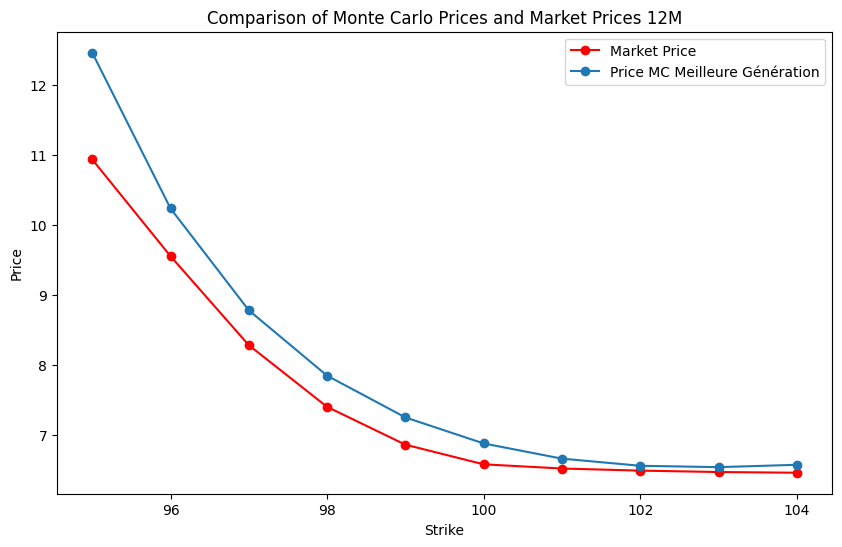

In [ ]:
strikes=[95,96,97,98,99,100,101,102,103,104]
prices=[]
prices3=[]
df_price_est = pd.DataFrame()
df_price_est3 = pd.DataFrame()
for i in range(len(strikes)):
  prices.append(valorisation_MC(S0, strikes[i], T, r, N, M ,  0.00200587, 0.10510233,-0.51429998, 0.11790743, 0.20236398))
  prices3.append(valorisation_MC(S0, strikes[i], T, r, N, M , 7.76139962e-11, 8.42623685e+00, -8.04325456e-01, -5.70381526e-02, 3.36522425e-02)) #--> paramètres optimaux

df_price_est['Strike'] = pd.Series(strikes)
df_price_est['Price MC'] = pd.Series(prices)
df_price_est['Market Price'] = data['Prix']
df_price_est

df_price_est3['Strike'] = pd.Series(strikes)
df_price_est3['Price MC3'] = pd.Series(prices3)
df_price_est3['Market Price'] = data['Prix']
df_price_est3
print(df_price_est3)

plt.close('all')
plt.figure(figsize=(10, 6))
plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
plt.plot(df_price_est['Strike'], df_price_est3['Price MC3'], label='Price MC Meilleure Génération', marker='o')

plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Comparison of Monte Carlo Prices and Market Prices 12M')
plt.legend()
plt.show()

   Strike  Price MC3  Market Price
0      95  11.185244         11.79
1      96   9.180301          8.95
2      97   7.833213          8.07
3      98   6.942184          7.03
4      99   6.351201          6.18
5     100   5.958244          6.04
6     101   5.705660          5.76
7     102   5.558665          5.50
8     103   5.487505          5.50
9     104   5.464841          5.39


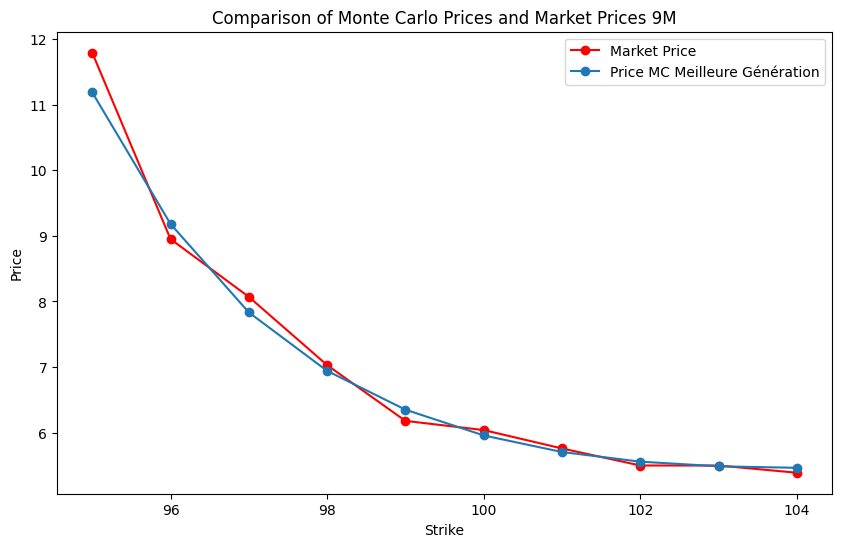

In [ ]:
strikes=[95,96,97,98,99,100,101,102,103,104]
prices=[]
prices2=[]
prices3=[]
df_price_est = pd.DataFrame()
df_price_est2 = pd.DataFrame()
df_price_est3 = pd.DataFrame()
for i in range(len(strikes)):
  prices2.append(valorisation_MC(S0, strikes[i], T, r, N, M ,  0.01, 0.1, -0.4, 0.1, 0.2))
  prices.append(valorisation_MC(S0, strikes[i], T, r, N, M ,  0.00200587, 0.10510233,-0.51429998, 0.11790743, 0.20236398))
  prices3.append(valorisation_MC(S0, strikes[i], 9/12, r, N, M , 7.76139962e-11, 8.42623685e+00, -8.04325456e-01, -5.70381526e-02, 3.36522425e-02))


df_price_est['Strike'] = pd.Series(strikes)
df_price_est['Price MC'] = pd.Series(prices)
df_price_est['Market Price'] = pd.Series(mat_9M)
df_price_est

df_price_est2['Strike'] = pd.Series(strikes)
df_price_est2['Price MC2'] = pd.Series(prices2)
df_price_est2['Market Price'] = pd.Series(mat_9M)
df_price_est2

df_price_est3['Strike'] = pd.Series(strikes)
df_price_est3['Price MC3'] = pd.Series(prices3)
df_price_est3['Market Price'] = pd.Series(mat_9M)
df_price_est3
print(df_price_est3)

plt.close('all')
plt.figure(figsize=(10, 6))

plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
plt.plot(df_price_est['Strike'], df_price_est3['Price MC3'], label='Price MC Meilleure Génération', marker='o')

plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Comparison of Monte Carlo Prices and Market Prices 9M')
plt.legend()
plt.show()

   Strike  Price MC3  Market Price
0      95   9.602874         10.71
1      96   7.866935          8.28
2      97   6.657926          6.91
3      98   5.816730          6.36
4      99   5.227204          5.29
5     100   4.815302          5.07
6     101   4.530215          4.76
7     102   4.336751          4.47
8     103   4.210530          4.35
9     104   4.135522          4.14


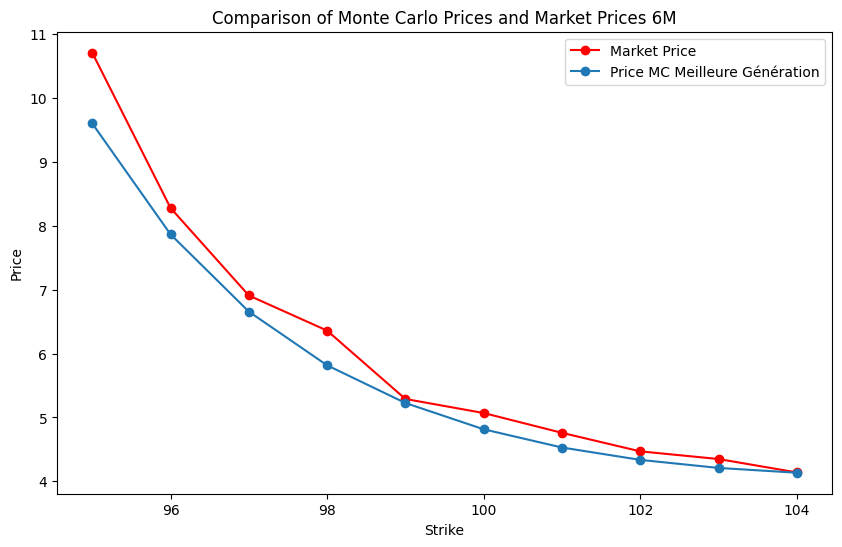

In [ ]:
strikes=[95,96,97,98,99,100,101,102,103,104]
prices=[]
prices2=[]
prices3=[]
df_price_est = pd.DataFrame()
df_price_est2 = pd.DataFrame()
df_price_est3 = pd.DataFrame()
for i in range(len(strikes)):
  prices2.append(valorisation_MC(S0, strikes[i], T, r, N, M ,  0.01, 0.1, -0.4, 0.1, 0.2))
  prices.append(valorisation_MC(S0, strikes[i], T, r, N, M ,  0.00200587, 0.10510233,-0.51429998, 0.11790743, 0.20236398))
  prices3.append(valorisation_MC(S0, strikes[i], 6/12, r, N, M , 7.76139962e-11, 8.42623685e+00, -8.04325456e-01, -5.70381526e-02, 3.36522425e-02))


df_price_est['Strike'] = pd.Series(strikes)
df_price_est['Price MC'] = pd.Series(prices)
df_price_est['Market Price'] = pd.Series(mat_6M)
df_price_est

df_price_est2['Strike'] = pd.Series(strikes)
df_price_est2['Price MC2'] = pd.Series(prices2)
df_price_est2['Market Price'] = pd.Series(mat_6M)
df_price_est2

df_price_est3['Strike'] = pd.Series(strikes)
df_price_est3['Price MC3'] = pd.Series(prices3)
df_price_est3['Market Price'] = pd.Series(mat_6M)
df_price_est3
print(df_price_est3)

plt.close('all')
plt.figure(figsize=(10, 6))
plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
plt.plot(df_price_est['Strike'], df_price_est3['Price MC3'], label='Price MC Meilleure Génération', marker='o')

plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Comparison of Monte Carlo Prices and Market Prices 6M')
plt.legend()
plt.show()

   Strike  Price MC3  Market Price
0      95   7.817899          8.67
1      96   6.380379          7.14
2      97   5.308305          5.98
3      98   4.502313          4.93
4      99   3.895739          4.09
5     100   3.442859          3.99
6     101   3.096385          3.43
7     102   2.840322          3.01
8     103   2.643531          2.72
9     104   2.495539          2.53


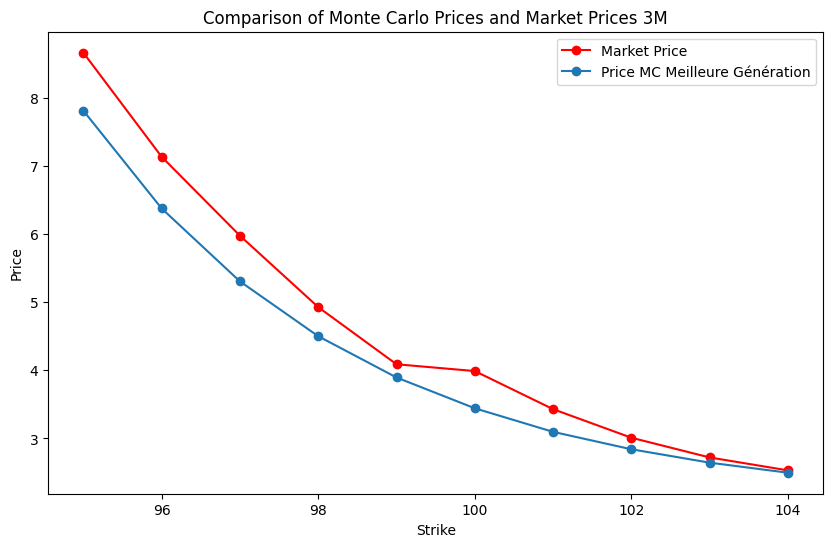

In [ ]:
strikes=[95,96,97,98,99,100,101,102,103,104]
prices=[]
prices2=[]
prices3=[]
df_price_est = pd.DataFrame()
df_price_est2 = pd.DataFrame()
df_price_est3 = pd.DataFrame()
for i in range(len(strikes)):
  prices2.append(valorisation_MC(S0, strikes[i], T, r, N, M ,  0.01, 0.1, -0.4, 0.1, 0.2))
  prices.append(valorisation_MC(S0, strikes[i], T, r, N, M ,  0.00200587, 0.10510233,-0.51429998, 0.11790743, 0.20236398))
  prices3.append(valorisation_MC(S0, strikes[i], 3/12, r, N, M , 7.76139962e-11, 8.42623685e+00, -8.04325456e-01, -5.70381526e-02, 3.36522425e-02))


df_price_est['Strike'] = pd.Series(strikes)
df_price_est['Price MC'] = pd.Series(prices)
df_price_est['Market Price'] = pd.Series(mat_3M)
df_price_est

df_price_est2['Strike'] = pd.Series(strikes)
df_price_est2['Price MC2'] = pd.Series(prices2)
df_price_est2['Market Price'] = pd.Series(mat_3M)
df_price_est2

df_price_est3['Strike'] = pd.Series(strikes)
df_price_est3['Price MC3'] = pd.Series(prices3)
df_price_est3['Market Price'] = pd.Series(mat_3M)
df_price_est3
print(df_price_est3)

plt.close('all')
plt.figure(figsize=(10, 6))
plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
plt.plot(df_price_est['Strike'], df_price_est3['Price MC3'], label='Price MC Meilleure Génération', marker='o')

plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Comparison of Monte Carlo Prices and Market Prices 3M')
plt.legend()
plt.show()

On observe bien qu'au fur et à mesure de nos tests sur les variables a, b, rho, m, sigma nos prédictions se rapprochent des prix du marché. Plusieurs étapes de tests ont été réalisé pour obtenir les meilleurs paramètres (Price MC Etape 3). Ce sont ces valeurs que nous utiliseront dans la suite du projet.

#SVI par EDP

In [ ]:
def black_scholes_edp(S0, S_max, K, T, r, N, M, a, b, rho, m, sigma):
    # Discretisation
    dt = T / M
    dS = S_max / N

    # Construction des matrices
    V = np.zeros((M + 1, N + 1))
    S = np.linspace(0, S_max, N + 1)

    # Condition finale (Payoff à l'échéance pour une option Call)
    V[-1, :] = np.maximum(S - K, 0)

    # Résolution de l'EDP par différences finies
    for i in range(M - 1, -1, -1):
      for j in range(1, N):
        deltaS = (V[i + 1, j + 1] - V[i + 1, j - 1]) / (2 * dS)
        deltaS2 = (V[i + 1, j + 1] - 2 * V[i + 1, j] + V[i + 1, j - 1]) / (dS ** 2)
        Sj = j * dS
        imp_vol = Calcul_SVI(a, b, rho, m, sigma, Sj)
        V[i, j] = np.exp(-r * dt) * (V[i + 1, j] + dt * (r * j * deltaS + 0.5 * imp_vol ** 2 * j ** 2 * deltaS2))
    option_price = V[0, int(N * S0 / S_max)]

    return option_price


In [ ]:
#paramètres :

S_max = 200
S0 = 100
N = 10
M = 100
mat = [3,6,9,12]

In [ ]:
def objective(params):
  a, b, rho, m, sigma = params
  mat_concat=[mat_3M,mat_6M,mat_9M,mat_12M]
  simulated_prices=[]
  for mat_tmp in mat:
    simulated_prices.append([black_scholes_edp(S0, S_max, K, mat_tmp/12, r, N, M, a, b, rho, m, sigma) for K in strikes])
  simulated_prices=np.array(simulated_prices)
  diff=[]
  for i in range(len(mat_concat)):
    diff.append((simulated_prices[i]-mat_concat[i])**2)
  return np.mean(diff)

In [ ]:

# Initial guess for the parameters

initial_guess= [1.60119929, 6.89502977e-03,2.94259261, 1.33753556, 3.73017416e-05]
#initial_guess= [-5.70448055e-02, 1.16712223e-02, 3.29628146e+00, 1.10941963e+00, 4.75469260e-05] # score : 0.40643809749412785 (40 options)
#initial_guess= [0.11355179, -0.21931791, -0.77136908, -0.01749795,  0.00113927] # paramètres optimaux

# Optimization
result_nelder_mead_python = nelder_mead(objective, initial_guess)

print("nelder mead python",result_nelder_mead_python)
optimized_params = result_nelder_mead_python[1]
print(f"Paramètres optimisés : {optimized_params}")

nelder mead python        message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: 0.40643809749174264
             x: [ 1.136e-01 -2.193e-01 -7.714e-01 -1.750e-02  1.139e-03]
           nit: 435
          nfev: 1000
 final_simplex: (array([[ 1.136e-01, -2.193e-01, ..., -1.750e-02,
                         1.139e-03],
                       [ 1.136e-01, -2.193e-01, ..., -1.750e-02,
                         1.139e-03],
                       ...,
                       [ 1.136e-01, -2.193e-01, ..., -1.750e-02,
                         1.139e-03],
                       [ 1.136e-01, -2.193e-01, ..., -1.750e-02,
                         1.139e-03]]), array([ 4.064e-01,  4.064e-01,  4.064e-01,  4.064e-01,
                        4.064e-01,  4.064e-01]))
Paramètres optimisés : [ 0.11355179 -0.21931791 -0.77136908 -0.01749795  0.00113927]


12M

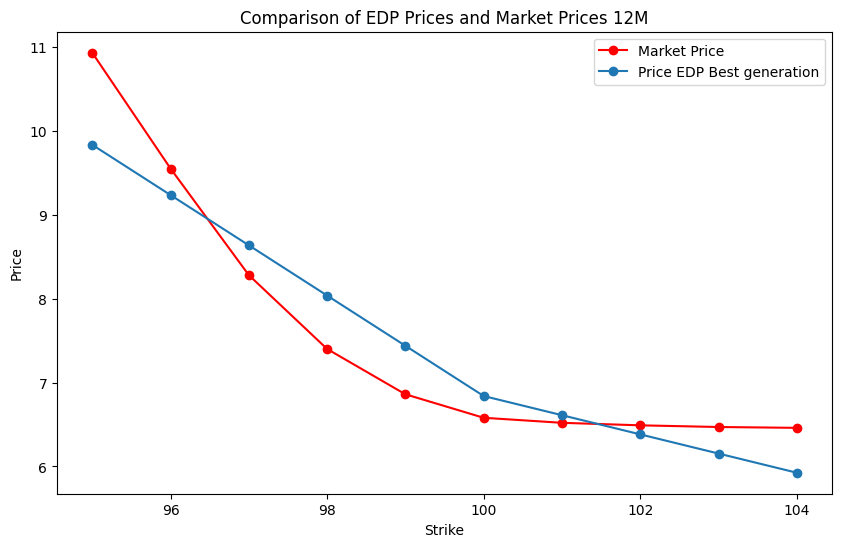

In [ ]:
prices=[]
prices3=[]
strikes=[95,96,97,98,99,100,101,102,103,104]
df_price_est = pd.DataFrame()
df_price_est3 = pd.DataFrame()
T = 12/12
for i in range(len(strikes)):
  prices3.append(black_scholes_edp(S0, S_max, strikes[i], T, r, N, M ,  0.11355179, -0.21931791, -0.77136908, -0.01749795,  0.00113927)) # --> paramètres optimaux
  prices.append(black_scholes_edp(S0, S_max, strikes[i], T, r, N, M ,  1.60119929, 6.89502977e-03,2.94259261, 1.33753556, 3.73017416e-05))

df_price_est['Strike'] = pd.Series(strikes)
df_price_est['Price MC'] = pd.Series(prices)
df_price_est['Market Price'] = mat_12M
df_price_est

df_price_est3['Strike'] = pd.Series(strikes)
df_price_est3['Price MC3'] = pd.Series(prices3)
df_price_est3['Market Price'] = mat_12M
df_price_est3

plt.close('all')
plt.figure(figsize=(10, 6))
plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
plt.plot(df_price_est['Strike'], df_price_est3['Price MC3'], label='Price EDP Best generation', marker='o')

plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Comparison of EDP Prices and Market Prices 12M')
plt.legend()
plt.show()

9M

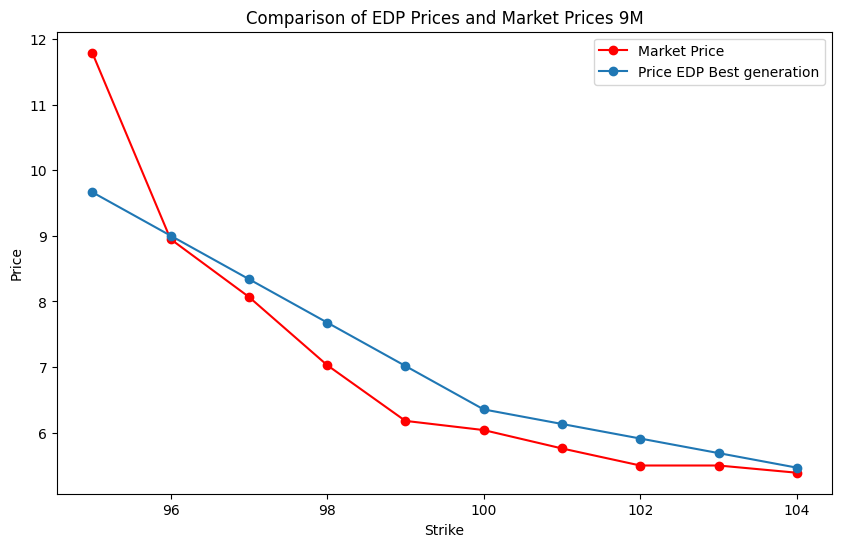

In [ ]:
prices=[]
prices3=[]
strikes=[95,96,97,98,99,100,101,102,103,104]
df_price_est = pd.DataFrame()
df_price_est3 = pd.DataFrame()
T = 9/12
for i in range(len(strikes)):
  prices3.append(black_scholes_edp(S0, S_max, strikes[i], T, r, N, M ,  0.11355179, -0.21931791, -0.77136908, -0.01749795,  0.00113927)) # --> paramètres optimaux
  prices.append(black_scholes_edp(S0, S_max, strikes[i], T, r, N, M ,  1.60119929, 6.89502977e-03,2.94259261, 1.33753556, 3.73017416e-05))

df_price_est['Strike'] = pd.Series(strikes)
df_price_est['Price MC'] = pd.Series(prices)
df_price_est['Market Price'] = mat_9M
df_price_est

df_price_est3['Strike'] = pd.Series(strikes)
df_price_est3['Price MC3'] = pd.Series(prices3)
df_price_est3['Market Price'] = mat_9M
df_price_est3

plt.close('all')
plt.figure(figsize=(10, 6))

plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
plt.plot(df_price_est['Strike'], df_price_est3['Price MC3'], label='Price EDP Best generation', marker='o')

plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Comparison of EDP Prices and Market Prices 9M')
plt.legend()
plt.show()

6M

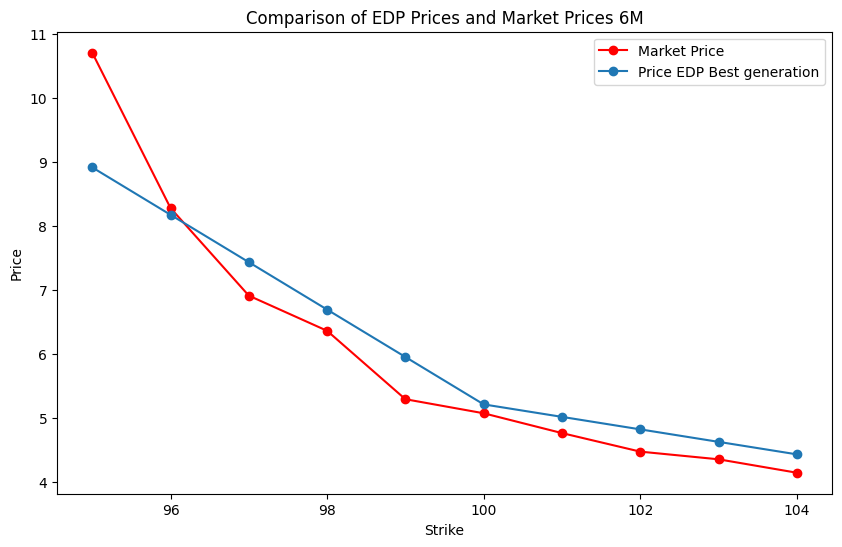

In [ ]:
prices=[]
prices3=[]
strikes=[95,96,97,98,99,100,101,102,103,104]
df_price_est = pd.DataFrame()
df_price_est3 = pd.DataFrame()
T = 6/12
for i in range(len(strikes)):
  prices3.append(black_scholes_edp(S0, S_max, strikes[i], T, r, N, M ,  0.11355179, -0.21931791, -0.77136908, -0.01749795,  0.00113927)) # --> paramètres optimaux
  prices.append(black_scholes_edp(S0, S_max, strikes[i], T, r, N, M ,  1.60119929, 6.89502977e-03,2.94259261, 1.33753556, 3.73017416e-05))

df_price_est['Strike'] = pd.Series(strikes)
df_price_est['Price MC'] = pd.Series(prices)
df_price_est['Market Price'] = mat_6M
df_price_est

df_price_est3['Strike'] = pd.Series(strikes)
df_price_est3['Price MC3'] = pd.Series(prices3)
df_price_est3['Market Price'] = mat_6M
df_price_est3

plt.close('all')
plt.figure(figsize=(10, 6))

plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
plt.plot(df_price_est['Strike'], df_price_est3['Price MC3'], label='Price EDP Best generation', marker='o')

plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Comparison of EDP Prices and Market Prices 6M')
plt.legend()
plt.show()

3M

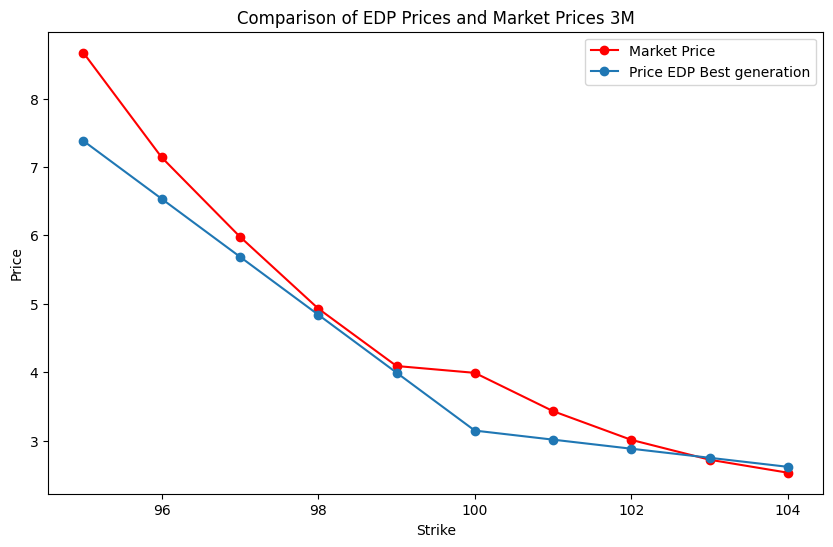

In [ ]:
prices=[]
prices3=[]
strikes=[95,96,97,98,99,100,101,102,103,104]
df_price_est = pd.DataFrame()
df_price_est3 = pd.DataFrame()
T = 3/12
for i in range(len(strikes)):
  prices3.append(black_scholes_edp(S0, S_max, strikes[i], T, r, N, M ,  0.11355179, -0.21931791, -0.77136908, -0.01749795,  0.00113927)) # --> paramètres optimaux
  prices.append(black_scholes_edp(S0, S_max, strikes[i], T, r, N, M ,  1.60119929, 6.89502977e-03,2.94259261, 1.33753556, 3.73017416e-05))

df_price_est['Strike'] = pd.Series(strikes)
df_price_est['Price MC'] = pd.Series(prices)
df_price_est['Market Price'] = mat_3M
df_price_est

df_price_est3['Strike'] = pd.Series(strikes)
df_price_est3['Price MC3'] = pd.Series(prices3)
df_price_est3['Market Price'] = mat_3M
df_price_est3

plt.close('all')
plt.figure(figsize=(10, 6))

plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
plt.plot(df_price_est['Strike'], df_price_est3['Price MC3'], label='Price EDP Best generation', marker='o')

plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Comparison of EDP Prices and Market Prices 3M')
plt.legend()
plt.show()

#Calibration de rho, m et sigma
Analysons les différents résultats obtenus jusqu'ici. Tout d'abord rappelons les meilleures valeurs trouvées pour chacun de nos paramètres du modèle SVI. <br><br>
Via Monte Carlo : <br><br>
avec les 40 options :
- a = 7.76139962e-11<br>
- b = 8.42623685e+00<br>
- rho = -8.04325456e-01<br>
- m = -5.70381526e-02<br>
- sigma = 3.36522425e-02<br>
- erreur moyenne = 0.19875553336211887<br><br>

Via EDP : <br><br>
avec les 40 options :
- a = 0.11355179<br>
- b = -0.21931791<br>
- rho = -0.77136908<br>
- m = -0.01749795<br>
- sigma = 0.00113927<br>
- erreur moyenne = 0.40643809749174264<br><br>


Dans notre cas, la valorisation par MC apparait significativement plus performante que par EDP. Nous utiliserons donc ses valeurs dans la suite de notre devoir !


In [ ]:
rho_EDP = -0.77136908
m_EDP = -0.01749795
sigma_EDP = 0.00113927

Pour MC

In [ ]:
rho_MC = 7.76139962e-11
m_MC = -5.70381526e-02
sigma_MC = 3.36522425e-02

## Calibration de a et b

In [ ]:
def objective(params, K, i, T, liste_prix, methode_utilise):
    a, b = params
    if methode_utilise == "EDP":
      N = 10
      M = 100
      simulated_prices = black_scholes_edp(S0, S_max, K, T, r, N, M, a, b, rho_EDP, m_EDP, sigma_EDP)
    if methode_utilise == "MC":
      N = 100
      M = 10000
      simulated_prices = valorisation_MC(S0, strikes[i], T, r, N, M , a, b, rho_MC, m_MC, sigma_MC)
    return (simulated_prices - liste_prix[i])**2

def graph_function(liste_a, liste_b, liste_strikes, maturite, liste_source, methode_utilise):
  df_price_est = pd.DataFrame()
  S0 = 100
  r = 0.00     # Taux d'intérêt
  prices = []
  if methode_utilise == "EDP":
    print("PAR EDP : ")
    S_max = 200  # Limite supérieure du prix de l'actif
    N = 10     # Pas d'espace
    M = 1000
    for i in range(len(strikes)):
      prices.append(black_scholes_edp(S0, S_max, strikes[i], maturite, r, N, M ,  liste_a[i], liste_b[i], rho_EDP, m_EDP, sigma_EDP))

  if methode_utilise == "MC":
    print("PAR MC : ")
    N = 100    # Nombre de pas de temps
    M = 10000  # Nombre de simulations
    for i in range(len(strikes)):
      prices.append(valorisation_MC(S0, strikes[i], T, r, N, M ,  liste_a[i], liste_b[i], rho_MC, m_MC, sigma_MC)) #--> paramètres optimaux

  df_price_est['Strike'] = pd.Series(strikes)
  df_price_est['Price Estimated'] = pd.Series(prices)
  df_price_est['Market Price'] = pd.Series(liste_source)
  print(df_price_est)

  plt.close('all')
  plt.figure(figsize=(10, 6))

  plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
  plt.plot(df_price_est['Strike'], df_price_est['Price Estimated'], label='Price Estimated Final', marker='o')

  plt.xlabel('Strike')
  plt.ylabel('Price')
  plt.title(f"Comparison of {methode_utilise} Prices and Market Prices {maturite*12}M")
  plt.legend()
  return plt.show()


<ipython-input-132-1508cdfc343d>:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  matrix = np.vstack((list_score_and_params[x][1] for x in range(0, dimension + 1)))


Paramètres optimisés par EDP pour Mat 12M et strike 95 : [0.13873328 0.0180626 ]
Paramètres optimisés par EDP pour Mat 12M et strike 96 : [0.15846185 0.05049124]
Paramètres optimisés par EDP pour Mat 12M et strike 97 : [0.13502713 0.02037755]
Paramètres optimisés par EDP pour Mat 12M et strike 98 : [0.18185938 0.04963443]
Paramètres optimisés par EDP pour Mat 12M et strike 99 : [0.17793297 0.03278117]
Paramètres optimisés par EDP pour Mat 12M et strike 100 : [0.18206624 0.05123688]
Paramètres optimisés par EDP pour Mat 12M et strike 101 : [0.15485912 0.02683329]
Paramètres optimisés par EDP pour Mat 12M et strike 102 : [0.16644195 0.0256399 ]
Paramètres optimisés par EDP pour Mat 12M et strike 103 : [0.18054536 0.04443968]
Paramètres optimisés par EDP pour Mat 12M et strike 104 : [0.17182556 0.02615185]
PAR EDP : 
   Strike  Price Estimated  Market Price
0      95         5.141473         10.93
1      96         4.820475          9.55
2      97         3.189838          8.28
3      98 

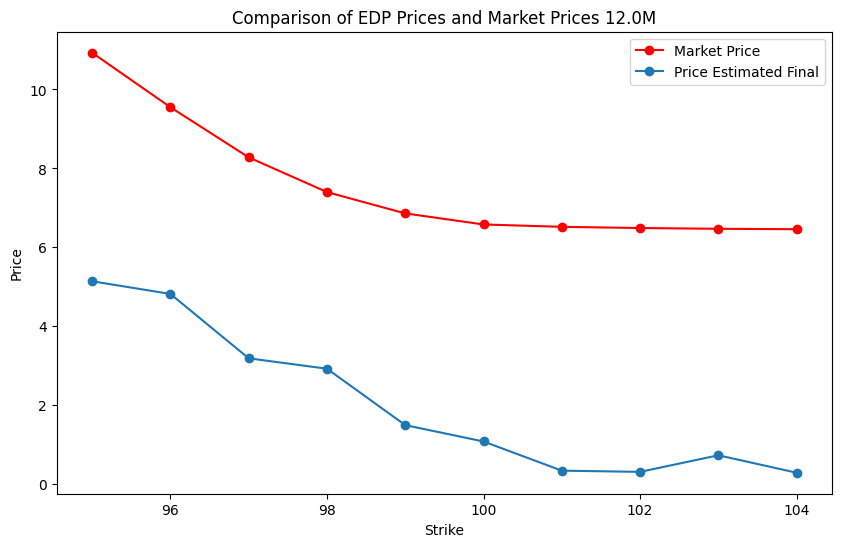

<ipython-input-132-1508cdfc343d>:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  matrix = np.vstack((list_score_and_params[x][1] for x in range(0, dimension + 1)))


Paramètres optimisés par MC pour Mat 12M et strike 95 : [0.02939008 4.15870067]
Paramètres optimisés par MC pour Mat 12M et strike 96 : [0.02186796 4.16768631]
Paramètres optimisés par MC pour Mat 12M et strike 97 : [-0.00790567  4.16237764]
Paramètres optimisés par MC pour Mat 12M et strike 98 : [-0.01683408  4.18744626]
Paramètres optimisés par MC pour Mat 12M et strike 99 : [-0.02841039  4.11879689]
Paramètres optimisés par MC pour Mat 12M et strike 100 : [-0.01981859  4.14880239]
Paramètres optimisés par MC pour Mat 12M et strike 101 : [-0.02835962  4.15083598]
Paramètres optimisés par MC pour Mat 12M et strike 102 : [-0.01275862  4.1559488 ]
Paramètres optimisés par MC pour Mat 12M et strike 103 : [-0.04430803  4.14463024]
Paramètres optimisés par MC pour Mat 12M et strike 104 : [-0.01061731  4.15701608]
PAR MC : 
   Strike  Price Estimated  Market Price
0      95         9.436492         10.93
1      96         9.093516          9.55
2      97         8.279983          8.28
3    

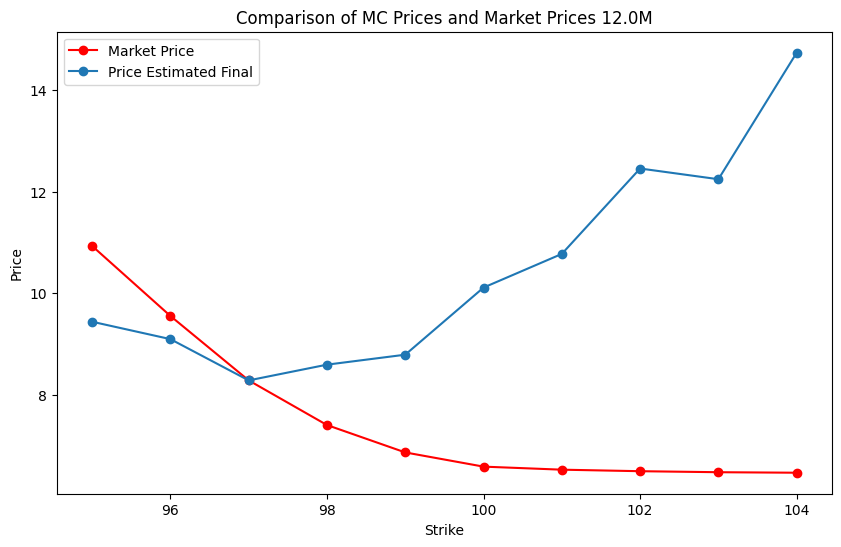

In [ ]:
a_12M_EDP = []
b_12M_EDP = []
a_12M_MC = []
b_12M_MC = []
initial_guess_12M_EDP = [0.15197531, 0.01197531]
for i in range(10):
  k = strikes[i]
  result_nelder_mead_python_EDP = nelder_mead(objective, initial_guess_12M_EDP, k, i, 12/12, mat_12M, "EDP")
  optimized_params_EDP = result_nelder_mead_python_EDP[1]
  a_EDP = optimized_params_EDP[0]
  b_EDP = optimized_params_EDP[1]
  a_12M_EDP.append(a_EDP)
  b_12M_EDP.append(b_EDP)
  print(f"Paramètres optimisés par EDP pour Mat 12M et strike {k} : {optimized_params_EDP}")
graph_function(a_12M_EDP, b_12M_EDP, strikes, 12/12, mat_12M, "EDP")

initial_guess_12M_MC = [1.25439411e-11 , 4.16080737e+00]
for i in range(10):
  k = strikes[i]
  result_nelder_mead_python_MC = nelder_mead(objective, initial_guess_12M_MC, k, i, 12/12, mat_12M, "MC")
  optimized_params_MC = result_nelder_mead_python_MC[1]
  a_MC = optimized_params_MC[0]
  b_MC = optimized_params_MC[1]
  a_12M_MC.append(a_MC)
  b_12M_MC.append(b_MC)
  print(f"Paramètres optimisés par MC pour Mat 12M et strike {k} : {optimized_params_MC}")

graph_function(a_12M_MC, b_12M_MC, strikes, 12/12, mat_12M, "MC")

In [ ]:
a_9M_EDP = []
b_9M_EDP = []
a_9M_MC = []
b_9M_MC = []
initial_guess_9M_EDP = [0.15197531, 0.01197531]
for i in range(10):
  k = strikes[i]
  result_nelder_mead_python_EDP = nelder_mead(objective, initial_guess_9M_EDP, k, i, 9/12, mat_9M, "EDP")
  optimized_params_EDP = result_nelder_mead_python_EDP[1]
  a_EDP = optimized_params_EDP[0]
  b_EDP = optimized_params_EDP[1]
  a_9M_EDP.append(a_EDP)
  b_9M_EDP.append(b_EDP)
  print(f"Paramètres optimisés par EDP pour Mat 9M et strike {k} : {optimized_params_EDP}")
graph_function(a_9M_EDP, b_9M_EDP, strikes, 9/12, mat_9M, "EDP")

initial_guess_9M_MC = [1.25439411e-11 , 4.16080737e+00]
for i in range(10):
  k = strikes[i]
  result_nelder_mead_python_MC = nelder_mead(objective, initial_guess_9M_MC, k, i, 9/12, mat_9M, "MC")
  optimized_params_MC = result_nelder_mead_python_MC[1]
  a_MC = optimized_params_MC[0]
  b_MC = optimized_params_MC[1]
  a_9M_MC.append(a_MC)
  b_9M_MC.append(b_MC)
  print(f"Paramètres optimisés par MC pour Mat 9M et strike {k} : {optimized_params_MC}")

graph_function(a_9M_MC, b_9M_MC, strikes, 9/12, mat_9M, "MC")

NameError: name 'minimize' is not defined

Paramètres optimisés par EDP pour Mat 6M et strike 95 : [3.10660793 0.20458417]
Paramètres optimisés par EDP pour Mat 6M et strike 96 : [0.5898092  0.19041534]
Paramètres optimisés par EDP pour Mat 6M et strike 97 : [0.51653233 0.17032781]
Paramètres optimisés par EDP pour Mat 6M et strike 98 : [0.5365798  0.17717519]
Paramètres optimisés par EDP pour Mat 6M et strike 99 : [0.51208214 0.16857259]
Paramètres optimisés par EDP pour Mat 6M et strike 100 : [0.55951568 0.1837281 ]
Paramètres optimisés par EDP pour Mat 6M et strike 101 : [0.53743554 0.18093689]
Paramètres optimisés par EDP pour Mat 6M et strike 102 : [0.53788794 0.17761582]
Paramètres optimisés par EDP pour Mat 6M et strike 103 : [0.5342394  0.18004996]
Paramètres optimisés par EDP pour Mat 6M et strike 104 : [0.55038545 0.17858399]
PAR EDP : 
   Strike  Price Estimated  Market Price
0      95        10.630715         10.71
1      96         8.256870          8.28
2      97         6.895451          6.91
3      98         6.

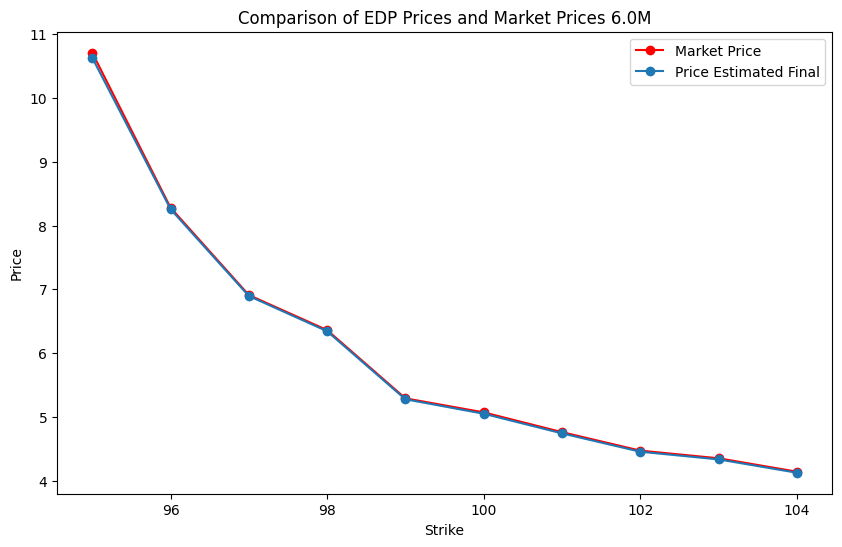

Paramètres optimisés par MC pour Mat 6M et strike 95 : [1.48005467e-11 8.52111973e+00]
Paramètres optimisés par MC pour Mat 6M et strike 96 : [1.33100662e-11 5.90292698e+00]
Paramètres optimisés par MC pour Mat 6M et strike 97 : [1.32469539e-11 4.44442887e+00]
Paramètres optimisés par MC pour Mat 6M et strike 98 : [1.3371731e-11 3.8196943e+00]
Paramètres optimisés par MC pour Mat 6M et strike 99 : [1.32061107e-11 2.95522100e+00]
Paramètres optimisés par MC pour Mat 6M et strike 100 : [1.40009952e-11 2.72611101e+00]
Paramètres optimisés par MC pour Mat 6M et strike 101 : [1.38729314e-11 2.47911524e+00]
Paramètres optimisés par MC pour Mat 6M et strike 102 : [1.38974066e-11 2.27473045e+00]
Paramètres optimisés par MC pour Mat 6M et strike 103 : [1.40659199e-11 2.16293923e+00]
Paramètres optimisés par MC pour Mat 6M et strike 104 : [1.36107016e-11 2.03007002e+00]
PAR MC : 
   Strike  Price Estimated  Market Price
0      95        13.916886         10.71
1      96        10.723622         

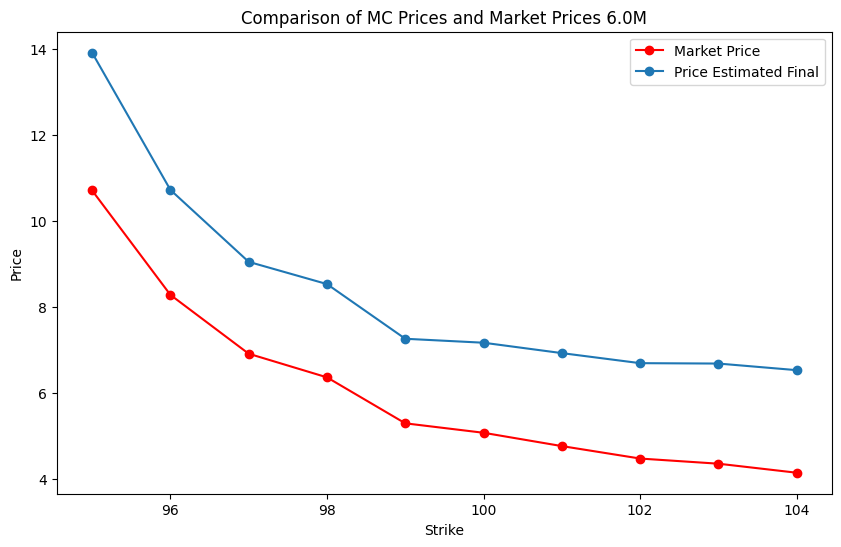

In [ ]:
a_6M_EDP = []
b_6M_EDP = []
a_6M_MC = []
b_6M_MC = []
initial_guess_6M_EDP = [0.15197531, 0.01197531]
for i in range(10):
  k = strikes[i]
  result_nelder_mead_python_EDP = nelder_mead(objective, initial_guess_6M_EDP, k, i, 6/12, mat_6M, "EDP")
  optimized_params_EDP = result_nelder_mead_python_EDP[1]
  a_EDP = optimized_params_EDP[0]
  b_EDP = optimized_params_EDP[1]
  a_6M_EDP.append(a_EDP)
  b_6M_EDP.append(b_EDP)
  print(f"Paramètres optimisés par EDP pour Mat 6M et strike {k} : {optimized_params_EDP}")
graph_function(a_6M_EDP, b_6M_EDP, strikes, 6/12, mat_6M, "EDP")

initial_guess_6M_MC = [1.25439411e-11 , 4.16080737e+00]
for i in range(10):
  k = strikes[i]
  result_nelder_mead_python_MC = nelder_mead(objective, initial_guess_6M_MC, k, i, 6/12, mat_6M, "MC")
  optimized_params_MC = result_nelder_mead_python_MC[1]
  a_MC = optimized_params_MC[0]
  b_MC = optimized_params_MC[1]
  a_6M_MC.append(a_MC)
  b_6M_MC.append(b_MC)
  print(f"Paramètres optimisés par MC pour Mat 6M et strike {k} : {optimized_params_MC}")

graph_function(a_6M_MC, b_6M_MC, strikes, 6/12, mat_6M, "MC")

<ipython-input-132-1508cdfc343d>:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  matrix = np.vstack((list_score_and_params[x][1] for x in range(0, dimension + 1)))


Paramètres optimisés par EDP pour Mat 3M et strike 95 : [0.08298776 0.04718728]
Paramètres optimisés par EDP pour Mat 3M et strike 96 : [0.10678373 0.06140474]
Paramètres optimisés par EDP pour Mat 3M et strike 97 : [0.08462549 0.04246178]
Paramètres optimisés par EDP pour Mat 3M et strike 98 : [0.11052273 0.05034198]
Paramètres optimisés par EDP pour Mat 3M et strike 99 : [0.09270199 0.04386554]
Paramètres optimisés par EDP pour Mat 3M et strike 100 : [0.10292302 0.06528018]
Paramètres optimisés par EDP pour Mat 3M et strike 101 : [0.09117571 0.03590901]
Paramètres optimisés par EDP pour Mat 3M et strike 102 : [0.06714183 0.05914401]
Paramètres optimisés par EDP pour Mat 3M et strike 103 : [0.10886941 0.03462733]
Paramètres optimisés par EDP pour Mat 3M et strike 104 : [0.12910219 0.05297048]
PAR EDP : 
   Strike  Price Estimated  Market Price
0      95         5.156706          8.67
1      96         4.280640          7.14
2      97         3.146765          5.98
3      98         2.

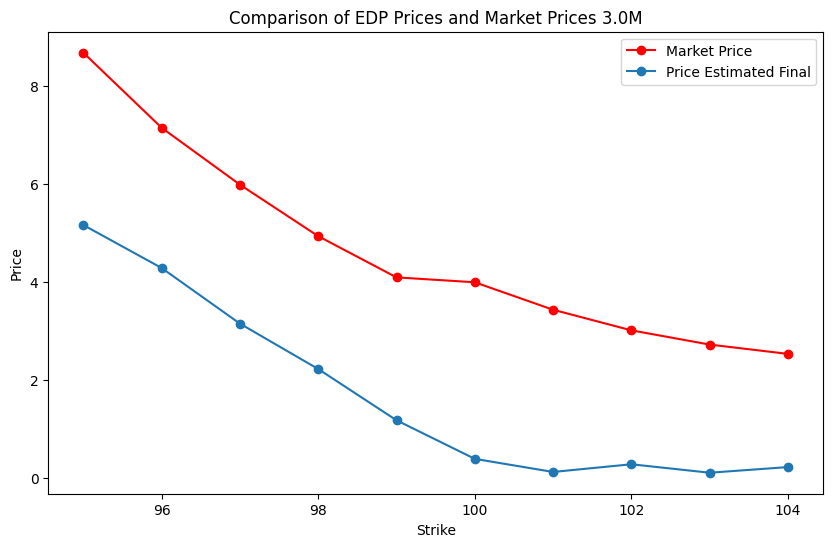

<ipython-input-132-1508cdfc343d>:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  matrix = np.vstack((list_score_and_params[x][1] for x in range(0, dimension + 1)))


Paramètres optimisés par MC pour Mat 3M et strike 95 : [0.00677568 4.1751175 ]
Paramètres optimisés par MC pour Mat 3M et strike 96 : [0.02906359 4.13078131]
Paramètres optimisés par MC pour Mat 3M et strike 97 : [0.0417204  4.16491605]
Paramètres optimisés par MC pour Mat 3M et strike 98 : [-0.01200497  4.1598543 ]
Paramètres optimisés par MC pour Mat 3M et strike 99 : [-0.00514933  4.16333474]
Paramètres optimisés par MC pour Mat 3M et strike 100 : [-0.01822123  4.14409594]
Paramètres optimisés par MC pour Mat 3M et strike 101 : [-0.0402631   4.14525514]
Paramètres optimisés par MC pour Mat 3M et strike 102 : [-0.03442561  4.13529121]
Paramètres optimisés par MC pour Mat 3M et strike 103 : [-0.02624875  4.14487444]
Paramètres optimisés par MC pour Mat 3M et strike 104 : [-0.01952553  4.14019312]
PAR MC : 
   Strike  Price Estimated  Market Price
0      95         8.629463          8.67
1      96         9.313448          7.14
2      97        10.193826          5.98
3      98        

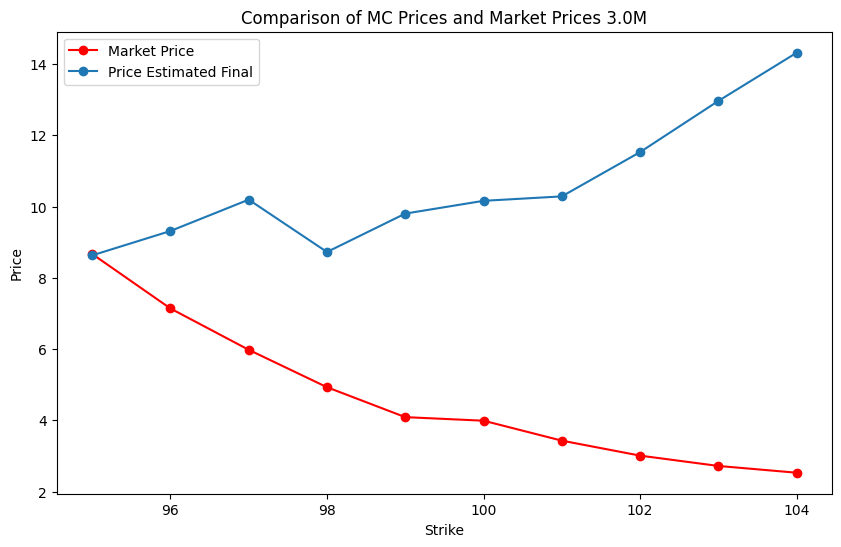

In [ ]:
a_3M_EDP = []
b_3M_EDP = []
a_3M_MC = []
b_3M_MC = []
initial_guess_3M_EDP = [0.1, 0.03]
for i in range(10):
  k = strikes[i]
  result_nelder_mead_python_EDP = nelder_mead(objective, initial_guess_3M_EDP, k, i, 3/12, mat_3M, "EDP")
  optimized_params_EDP = result_nelder_mead_python_EDP[1]
  a_EDP = optimized_params_EDP[0]
  b_EDP = optimized_params_EDP[1]
  a_3M_EDP.append(a_EDP)
  b_3M_EDP.append(b_EDP)
  print(f"Paramètres optimisés par EDP pour Mat 3M et strike {k} : {optimized_params_EDP}")
graph_function(a_3M_EDP, b_3M_EDP, strikes, 3/12, mat_3M, "EDP")

initial_guess_3M_MC = [1.25439411e-11 , 4.16080737e+00]
for i in range(10):
  k = strikes[i]
  result_nelder_mead_python_MC = nelder_mead(objective, initial_guess_3M_MC, k, i, 3/12, mat_3M, "MC")
  optimized_params_MC = result_nelder_mead_python_MC[1]
  a_MC = optimized_params_MC[0]
  b_MC = optimized_params_MC[1]
  a_3M_MC.append(a_MC)
  b_3M_MC.append(b_MC)
  print(f"Paramètres optimisés par MC pour Mat 3M et strike {k} : {optimized_params_MC}")

graph_function(a_3M_MC, b_3M_MC, strikes, 3/12, mat_3M, "MC")

#Nappes de a et b via l'EDP

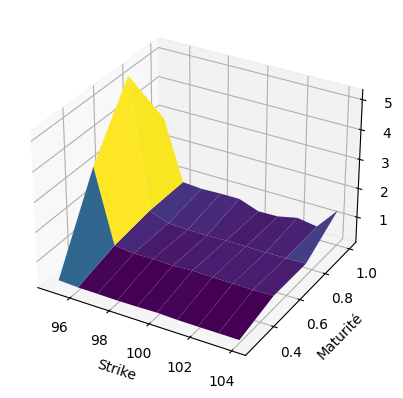

None


In [ ]:
Z1_EDP = np.array([a_3M_EDP, a_6M_EDP, a_9M_EDP, a_12M_EDP])

print(plot_nappe(strike, [0.25, 0.5, 0.75, 1], Z1_EDP))

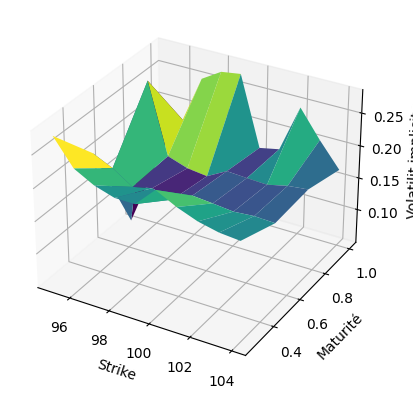

None


In [ ]:
Z2_EDP = np.array([b_3M_EDP,  b_6M_EDP, b_9M_EDP, b_12M_EDP])

print(plot_nappe(strike, [0.25, 0.5, 0.75, 1], Z2_EDP))

#Nappes de a et b via MC

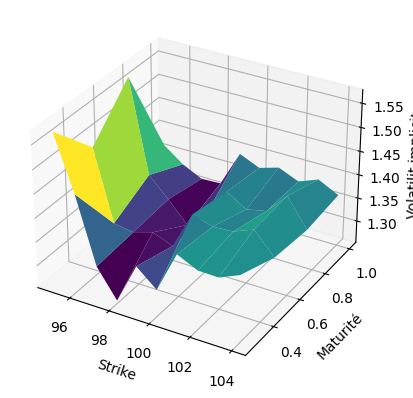

None


In [ ]:
Z1_MC = np.array([a_3M_MC, a_6M_MC, a_9M_MC, a_12M_MC])

print(plot_nappe(strike, [0.25, 0.5, 0.75, 1], Z1_MC))

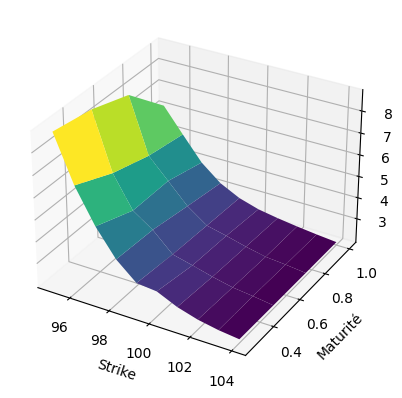

None


In [ ]:
Z2_MC = np.array([b_3M_MC, b_6M_MC, b_9M_MC, b_12M_MC])

print(plot_nappe(strike, [0.25,0.5,0.75,1], Z2_MC))

# Regularisation des nappes :

Nappe de a via *EDP*

In [ ]:
def objective_A(params, i, j, T):
    a = params
    N = 10
    M = 100
    simulated_prices = black_scholes_edp(S0, S_max, strikes[i], T, r, N, M, a, Z2_EDP[j][i], rho_EDP, m_EDP, sigma_EDP)
    return (simulated_prices - prices_by_mat[j][i])**2

A2_regul_EDP=[]

mat=[0.25, 0.5, 0.75, 1.0]
liste_a_EDP=[a_3M_EDP, a_6M_EDP, a_9M_EDP, a_12M_EDP]
liste_b_EDP=[b_3M_EDP, b_6M_EDP, b_9M_EDP, b_12M_EDP]
prices_by_mat=[mat_3M, mat_6M, mat_9M, mat_12M]

for j in range(len(mat)):
  a_EDP_tmp=[]
  for i in range(len(strikes)):
    res= nelder_mead(objective_A, liste_a_EDP[j][i], i,j,mat[j])
    a_EDP_tmp.append(res[1])
  A2_regul_EDP.append(a_EDP_tmp)

print(A2_regul_EDP)

NameError: name 'a_3M_EDP' is not defined

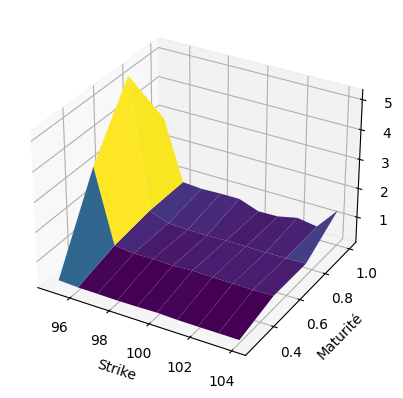

None


In [ ]:
ZA2_EDP = np.array([[x[0] for x in A2_regul_EDP[0]], [x[0] for x in A2_regul_EDP[1]] , [x[0] for x in A2_regul_EDP[2]] , [x[0] for x in A2_regul_EDP[3]]])

print(plot_nappe(strike, [0.25,0.5,0.75,1], ZA2_EDP))

Nappe de b via *EDP*

In [ ]:
def objective_B(params, i, j, T):
    b = params
    N = 10
    M = 100
    simulated_prices = black_scholes_edp(S0, S_max, strikes[i], T, r, N, M, ZA2_EDP[j][i], b, rho_EDP, m_EDP, sigma_EDP)
    return (simulated_prices - prices_by_mat[j][i])**2

B2_regul_EDP=[]

mat=[0.25, 0.5, 0.75, 1.0]
liste_a_EDP=[a_3M_EDP, a_6M_EDP, a_9M_EDP, a_12M_EDP]
liste_b_EDP=[b_3M_EDP, b_6M_EDP, b_9M_EDP, b_12M_EDP]
prices_by_mat=[mat_3M, mat_6M, mat_9M, mat_12M]

for j in range(len(mat)):
  b_tmp=[]
  for i in range(len(strikes)):
    res=nelder_mead(objective_B, liste_b_EDP[j][i], i,j,mat[j])
    b_tmp.append(res[1])
  B2_regul_EDP.append(b_tmp)

print(B2_regul_EDP)

[[array([0.27435853]), array([0.23493012]), array([0.21848138]), array([0.20890311]), array([0.2087367]), array([0.23850449]), array([0.22258954]), array([0.21071157]), array([0.20364463]), array([0.2008872])], [array([0.20458417]), array([0.19041534]), array([0.17032781]), array([0.17717519]), array([0.16857259]), array([0.1837281]), array([0.18093689]), array([0.17761582]), array([0.18004996]), array([0.17858399])], [array([0.05195214]), array([0.28050441]), array([0.17278912]), array([0.16244778]), array([0.15879318]), array([0.17530603]), array([0.17331894]), array([0.17197157]), array([0.17901715]), array([0.18246265])], [array([0.12796713]), array([0.17829172]), array([0.25060947]), array([0.26912355]), array([0.27358466]), array([0.16701377]), array([0.17334831]), array([0.2461419]), array([0.20436439]), array([0.1668867])]]


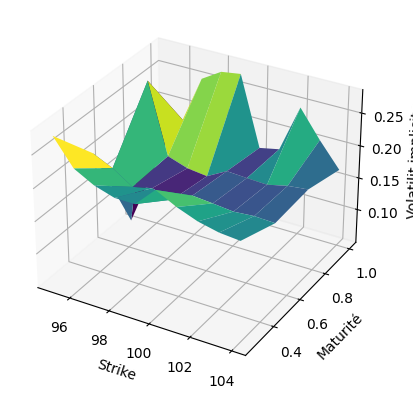

None


In [ ]:
ZB2_EDP = np.array([[x[0] for x in B2_regul_EDP[0]], [x[0] for x in B2_regul_EDP[1]] , [x[0] for x in B2_regul_EDP[2]] , [x[0] for x in B2_regul_EDP[3]]])

print(plot_nappe(strike, [0.25,0.5,0.75,1], ZB2_EDP))

Plot


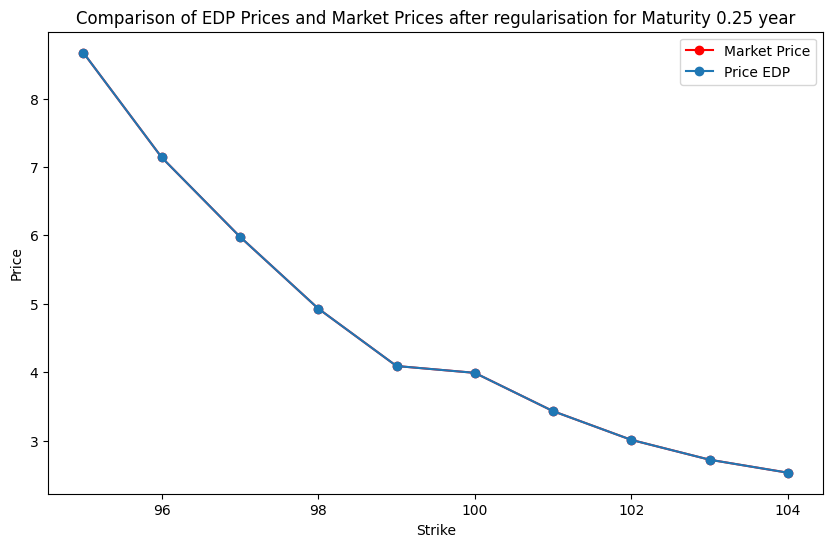

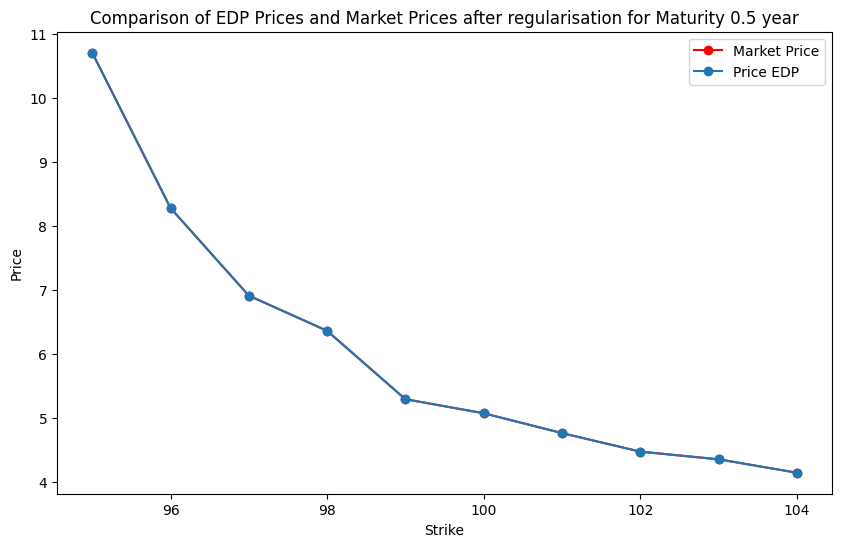

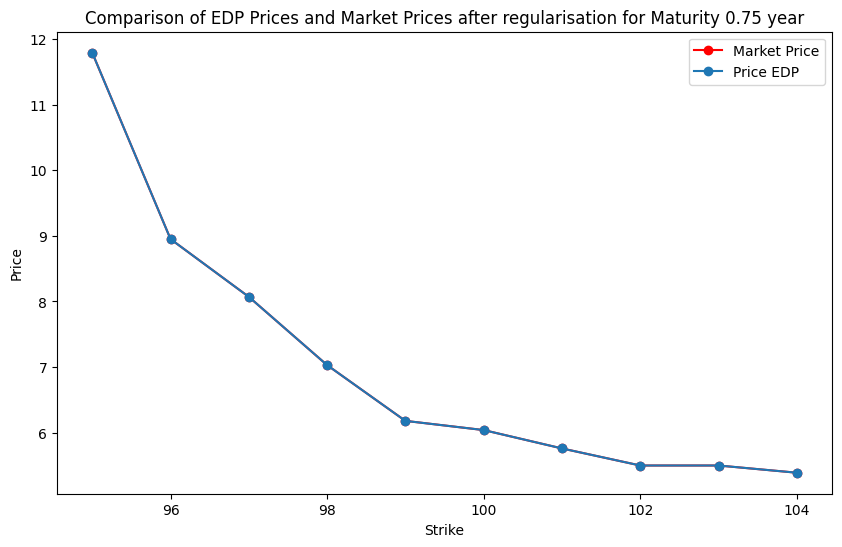

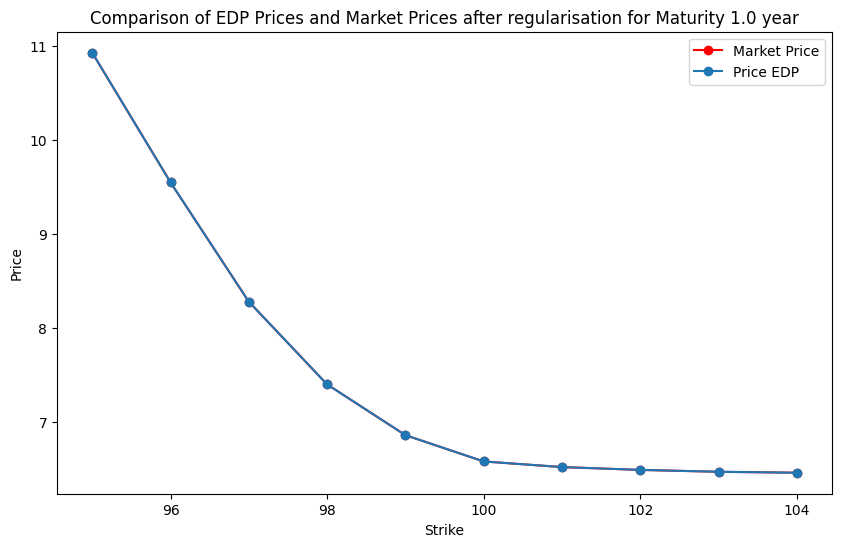

In [ ]:
df_price_est=pd.DataFrame()
prices_reg=[]
prices_by_mat=[mat_3M, mat_6M, mat_9M, mat_12M]
N = 10
M = 100

for j in range(len(mat)):
  for i in range(len(strikes)):
    prices_reg.append(black_scholes_edp(S0, S_max, strikes[i], mat[j], r, N, M, ZA2_EDP[j][i], ZB2_EDP[j][i], rho_EDP, m_EDP, sigma_EDP))
  df_price_est['Strike'] = pd.Series(strikes)
  df_price_est['Market Price'] = prices_by_mat[j]
  df_price_est['Price EDP Après Regularisation'] = pd.Series(prices_reg)
  plt.close('all')
  plt.figure(figsize=(10, 6))

  plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
  plt.plot(df_price_est['Strike'], df_price_est['Price EDP Après Regularisation'], label='Price EDP', marker='o')

  plt.xlabel('Strike')
  plt.ylabel('Price')
  plt.title('Comparison of EDP Prices and Market Prices after regularisation for Maturity '+str(mat[j])+' year')
  plt.legend()
  plt.show()
  prices_reg=[]

Nappe de a via MC

In [ ]:
def objective_A(params, i, j, T):
    a = params
    N = 100
    M = 10000
    simulated_prices = valorisation_MC(S0, strikes[i], T, r, N, M , a, Z2_MC[j][i], rho_MC, m_MC, sigma_MC)
    return (simulated_prices - prices_by_mat[j][i])**2

A2_regul_MC=[]

mat=[0.25, 0.5, 0.75, 1.0]
liste_a_MC=[a_3M_MC, a_6M_MC, a_9M_MC, a_12M_MC]
liste_b_MC=[b_3M_MC, b_6M_MC, b_9M_MC, b_12M_MC]
prices_by_mat=[mat_3M, mat_6M, mat_9M, mat_12M]


for j in range(len(mat)):
  a_MC_tmp=[]
  for i in range(len(strikes)):
    res=nelder_mead(objective_A, liste_a_MC[j][i], i,j,mat[j])
    a_MC_tmp.append(res[1])
  A2_regul_MC.append(a_MC_tmp)

print(A2_regul_MC)

[[array([1.64999375e-11]), array([1.52972845e-11]), array([1.31879818e-11]), array([1.2594319e-11]), array([1.34545359e-11]), array([1.37502439e-11]), array([1.46664761e-11]), array([1.44546245e-11]), array([1.37564557e-11]), array([1.46372946e-11])], [array([1.48005467e-11]), array([1.39755695e-11]), array([1.39093016e-11]), array([1.40403175e-11]), array([1.38664163e-11]), array([1.4701045e-11]), array([1.38729314e-11]), array([1.4592277e-11]), array([1.47692159e-11]), array([1.42912367e-11])], [array([1.56841904e-11]), array([1.37188253e-11]), array([1.33068198e-11]), array([1.28720375e-11]), array([1.3919429e-11]), array([1.45328319e-11]), array([1.42654852e-11]), array([1.36745342e-11]), array([1.48250067e-11]), array([1.35246935e-11])], [array([1.36482734e-11]), array([1.40049447e-11]), array([1.37897411e-11]), array([1.31519976e-11]), array([1.46156705e-11]), array([1.37320629e-11]), array([1.45493131e-11]), array([1.36743045e-11]), array([1.38385303e-11]), array([1.43024325e-11

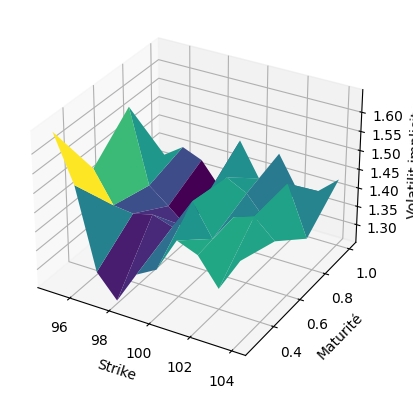

None


In [ ]:
ZA2_MC = np.array([[x[0] for x in A2_regul_MC[0]], [x[0] for x in A2_regul_MC[1]] , [x[0] for x in A2_regul_MC[2]] , [x[0] for x in A2_regul_MC[3]]])

print(plot_nappe(strike, [0.25,0.5,0.75,1], ZA2_MC))

Nappe après Régularisation pour b via MC

In [ ]:
def objective_B(params, i, j, T):
    b = params
    N = 100
    M = 10000
    simulated_prices = valorisation_MC(S0, strikes[i], T, r, N, M , ZA2_MC[j][i], b, rho_MC, m_MC, sigma_MC)
    return (simulated_prices - prices_by_mat[j][i])**2

B2_regul_MC=[]

mat=[0.25, 0.5, 0.75, 1.0]
liste_a_MC=[a_3M_MC, a_6M_MC, a_9M_MC, a_12M_MC]
liste_b_MC=[b_3M_MC, b_6M_MC, b_9M_MC, b_12M_MC]
prices_by_mat=[mat_3M, mat_6M, mat_9M, mat_12M]

for j in range(len(mat)):
  b_tmp=[]
  for i in range(len(strikes)):
    res=nelder_mead(objective_B, liste_b_MC[j][i], i,j,mat[j])
    b_tmp.append(res[1])
  B2_regul_MC.append(b_tmp)

print(B2_regul_MC)


[[array([8.81245998]), array([6.70448243]), array([5.13782508]), array([3.91934645]), array([3.12246383]), array([3.03346991]), array([2.61289437]), array([2.33554128]), array([2.16019651]), array([2.04993784])], [array([8.52111973]), array([5.90292698]), array([4.44442887]), array([3.8196943]), array([2.955221]), array([2.72611101]), array([2.47905472]), array([2.27473045]), array([2.16293923]), array([2.03007002])], [array([7.9317031]), array([5.3708816]), array([4.44612837]), array([3.51800337]), array([2.86488057]), array([2.6523073]), array([2.41151921]), array([2.21454299]), array([2.1276902]), array([2.01839824])], [array([6.19773387]), array([5.07596857]), array([3.97801018]), array([3.23732349]), array([2.78005116]), array([2.50272999]), array([2.34342372]), array([2.21469537]), array([2.10574845]), array([2.01335514])]]


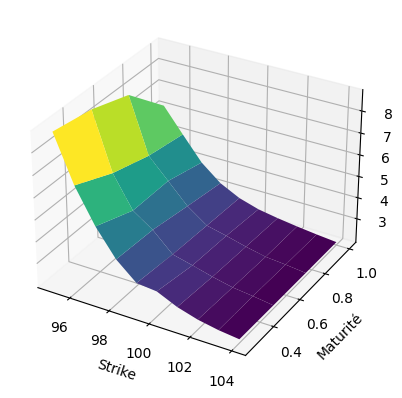

None


In [ ]:
ZB2_MC = np.array([[x[0] for x in B2_regul_MC[0]], [x[0] for x in B2_regul_MC[1]] , [x[0] for x in B2_regul_MC[2]] , [x[0] for x in B2_regul_MC[3]]])

print(plot_nappe(strike, [0.25,0.5,0.75,1], ZB2_MC))

Plot pour vérifier les résultats :

   Strike  Market Price  Price MC Après Regularisation
0      95          8.67                       8.669990
1      96          7.14                       7.139991
2      97          5.98                       5.980008
3      98          4.93                       4.930010
4      99          4.09                       4.090020
5     100          3.99                       3.989986
6     101          3.43                       3.429989
7     102          3.01                       3.009976
8     103          2.72                       2.720041
9     104          2.53                       2.530032


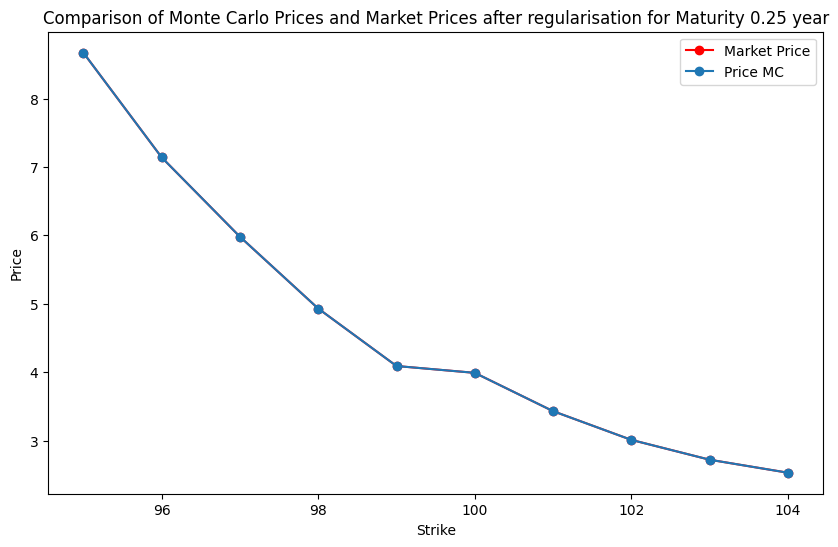

   Strike  Market Price  Price MC Après Regularisation
0      95         10.71                      10.710009
1      96          8.28                       8.279988
2      97          6.91                       6.909978
3      98          6.36                       6.359990
4      99          5.29                       5.289959
5     100          5.07                       5.069992
6     101          4.76                       4.759943
7     102          4.47                       4.469956
8     103          4.35                       4.349957
9     104          4.14                       4.139931


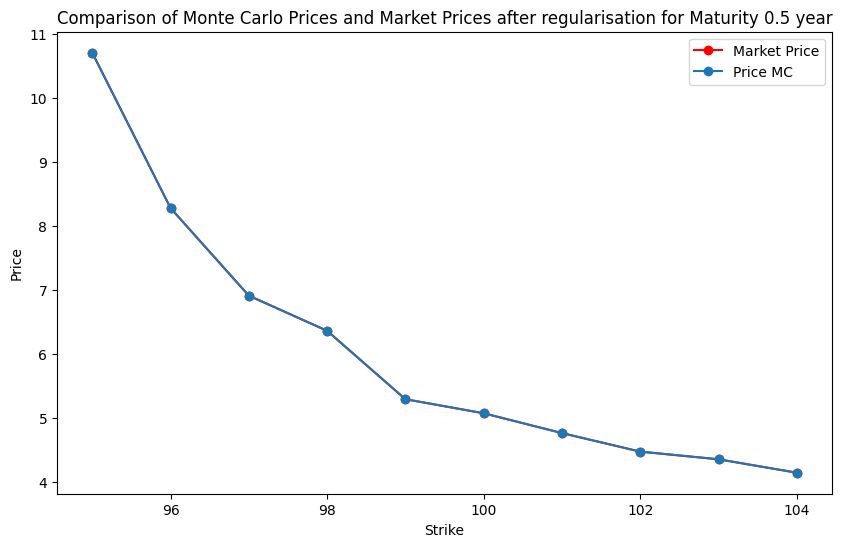

   Strike  Market Price  Price MC Après Regularisation
0      95         11.79                      11.790004
1      96          8.95                       8.950028
2      97          8.07                       8.070018
3      98          7.03                       7.030031
4      99          6.18                       6.179958
5     100          6.04                       6.039954
6     101          5.76                       5.759925
7     102          5.50                       5.500024
8     103          5.50                       5.499987
9     104          5.39                       5.390059


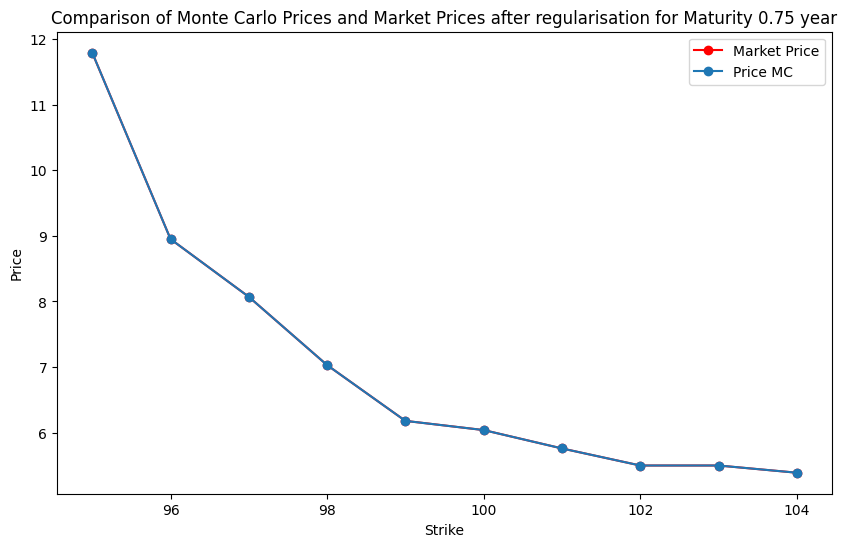

   Strike  Market Price  Price MC Après Regularisation
0      95         10.93                      10.930016
1      96          9.55                       9.549975
2      97          8.28                       8.279965
3      98          7.40                       7.400006
4      99          6.86                       6.859956
5     100          6.58                       6.580076
6     101          6.52                       6.519968
7     102          6.49                       6.490054
8     103          6.47                       6.470078
9     104          6.46                       6.459990


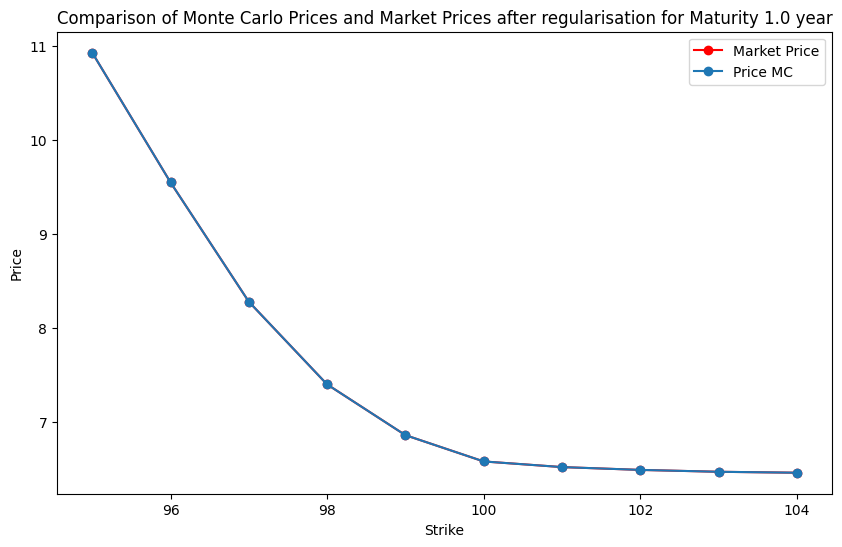

In [ ]:
df_price_est=pd.DataFrame()
prices_reg=[]
prices_by_mat=[mat_3M, mat_6M, mat_9M, mat_12M]
N = 100
M = 10000

for j in range(len(mat)):
  for i in range(len(strikes)):
    prices_reg.append(valorisation_MC(S0, strikes[i], mat[j], r, N, M , ZA2_MC[j][i], ZB2_MC[j][i], rho_MC, m_MC, sigma_MC))
  df_price_est['Strike'] = pd.Series(strikes)
  df_price_est['Market Price'] = prices_by_mat[j]
  df_price_est['Price MC Après Regularisation'] = pd.Series(prices_reg)
  print(df_price_est)
  plt.close('all')
  plt.figure(figsize=(10, 6))
  plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
  plt.plot(df_price_est['Strike'], df_price_est['Price MC Après Regularisation'], label='Price MC', marker='o')

  plt.xlabel('Strike')
  plt.ylabel('Price')
  plt.title('Comparison of Monte Carlo Prices and Market Prices after regularisation for Maturity '+str(mat[j])+' year')
  plt.legend()
  plt.show()
  prices_reg=[]

#Question 5

Interpolation des coefficients pour pricer une option Matrurité 8M Strike 99.5 avec EDP

In [ ]:
call_strike=[]
N = 10
M = 100
mat = [0.25,0.5,0.75,1]

for j in range(len(mat)):
  tmp=[]
  for i in range(len(strikes)):
    tmp.append(black_scholes_edp(S0, S_max, strikes[i], mat[j], r, N, M, ZA2_EDP[j][i], ZB2_EDP[j][i], rho_EDP, m_EDP, sigma_EDP))
  call_strike.append(tmp)

In [ ]:
strike_interpolated=np.linspace(95, 104, 19)
call_strike_interpolated=[]

interpol_a_3M=quadratic_interpolation(strike_interpolated, strikes, ZA2_EDP[0])
interpol_a_6M=quadratic_interpolation(strike_interpolated, strikes, ZA2_EDP[1])
interpol_a_9M=quadratic_interpolation(strike_interpolated, strikes, ZA2_EDP[2])
interpol_a_12M=quadratic_interpolation(strike_interpolated, strikes, ZA2_EDP[3])

interpol_a_by_mat_by_strike=[interpol_a_3M,interpol_a_6M,interpol_a_9M,interpol_a_12M]

interpol_b_3M=quadratic_interpolation(strike_interpolated, strikes, ZB2_EDP[0])
interpol_b_6M=quadratic_interpolation(strike_interpolated, strikes, ZB2_EDP[1])
interpol_b_9M=quadratic_interpolation(strike_interpolated, strikes, ZB2_EDP[2])
interpol_b_12M=quadratic_interpolation(strike_interpolated, strikes, ZB2_EDP[3])

interpol_b_by_mat_by_strike=[interpol_b_3M,interpol_b_6M,interpol_b_9M,interpol_b_12M]

for j in range(len(mat)):
  tmp=[]
  for i in range(len(strike_interpolated)):
    tmp.append(black_scholes_edp(S0, S_max, strike_interpolated[i], mat[j], r, N, M, interpol_a_by_mat_by_strike[j][i], interpol_b_by_mat_by_strike[j][i], rho_EDP, m_EDP, sigma_EDP))
  call_strike_interpolated.append(tmp)

price_by_strike_interpol=pd.DataFrame()
price_by_strike_interpol['Interpolated prices by Strikes Mat 3M']=pd.Series(call_strike_interpolated[0])
price_by_strike_interpol['Interpolated prices by Strikes Mat 6M']=pd.Series(call_strike_interpolated[1])
price_by_strike_interpol['Interpolated prices by Strikes Mat 9M']=pd.Series(call_strike_interpolated[2])
price_by_strike_interpol['Interpolated prices by Strikes Mat 12M']=pd.Series(call_strike_interpolated[3])

price_by_strike_interpol=price_by_strike_interpol.set_index(pd.Index(strike_interpolated))
print(price_by_strike_interpol)

       Interpolated prices by Strikes Mat 3M  \
95.0                                8.670000   
95.5                                7.871138   
96.0                                7.140000   
96.5                                6.504307   
97.0                                5.980000   
97.5                                5.439582   
98.0                                4.930000   
98.5                                4.481621   
99.0                                4.090000   
99.5                                3.941037   
100.0                               3.990000   
100.5                               3.848871   
101.0                               3.430000   
101.5                               3.203002   
102.0                               3.010000   
102.5                               2.849595   
103.0                               2.720000   
103.5                               2.613247   
104.0                               2.530000   

       Interpolated prices by Strikes M

In [ ]:
price_995_EDP_by_mat=price_by_strike_interpol.iloc[9,:].values
mat = [0.25,0.5,0.75,1]
#mat_2=[3,6,8,9,12]
mat_2=[3/12,6/12,8/12,9/12,12/12]
price_mat_interpolated_995=quadratic_interpolation(mat_2,mat,price_995_EDP_by_mat)

In [ ]:
price_strike_995_by_mat_interpol=pd.DataFrame(price_mat_interpolated_995)
price_strike_995_by_mat_interpol=price_strike_995_by_mat_interpol.set_index(pd.Index(mat_2))
price_strike_995_by_mat_interpol.columns=["Call Price by Maturity for Strike 99.5"]
price_strike_995_by_mat_interpol

,Call Price by Maturity for Strike 99.5
0.250000,3.941037
0.500000,5.069517
0.666667,5.726151
0.750000,6.025762
1.000000,7.332560


Interpolation des coefficients pour pricer une option Matrurité 8M Strike 99.5 avec MC

In [ ]:
call_strike=[]
N = 100
M = 10000

for j in range(len(mat)):
  tmp=[]
  for i in range(len(strikes)):
    tmp.append(valorisation_MC(S0, strikes[i], mat[j], r, N, M , ZA2_MC[j][i], ZB2_MC[j][i], rho_MC, m_MC, sigma_MC))
  call_strike.append(tmp)

In [ ]:
strike_interpolated=np.linspace(95, 104, 19)
call_strike_interpolated=[]
interpol_a_MC_by_mat_by_strike=[]
interpol_b_by_mat_by_strike=[]

interpol_a_MC_3M=quadratic_interpolation(strike_interpolated, strikes, ZA2_MC[0])
interpol_a_MC_6M=quadratic_interpolation(strike_interpolated, strikes, ZA2_MC[1])
interpol_a_MC_9M=quadratic_interpolation(strike_interpolated, strikes, ZA2_MC[2])
interpol_a_MC_12M=quadratic_interpolation(strike_interpolated, strikes, ZA2_MC[3])

interpol_a_MC_by_mat_by_strike=[interpol_a_MC_3M,interpol_a_MC_6M,interpol_a_MC_9M,interpol_a_MC_12M]
print("ok", interpol_a_MC_by_mat_by_strike)

interpol_b_MC_3M=quadratic_interpolation(strike_interpolated, strikes, ZB2_MC[0])
interpol_b_MC_6M=quadratic_interpolation(strike_interpolated, strikes, ZB2_MC[1])
interpol_b_MC_9M=quadratic_interpolation(strike_interpolated, strikes, ZB2_MC[2])
interpol_b_MC_12M=quadratic_interpolation(strike_interpolated, strikes, ZB2_MC[3])

interpol_b_MC_by_mat_by_strike=[interpol_b_MC_3M,interpol_b_MC_6M,interpol_b_MC_9M,interpol_b_MC_12M]

for j in range(len(mat)):
  tmp=[]
  for i in range(len(strike_interpolated)):
    tmp.append(valorisation_MC(S0, strike_interpolated[i], mat[j], r, N, M, interpol_a_MC_by_mat_by_strike[j][i], interpol_b_MC_by_mat_by_strike[j][i], rho_MC, m_MC, sigma_MC))
  call_strike_interpolated.append(tmp)

price_by_strike_interpol=pd.DataFrame()
price_by_strike_interpol['Interpolated prices by Strikes Mat 3M']=pd.Series(call_strike_interpolated[0])
price_by_strike_interpol['Interpolated prices by Strikes Mat 6M']=pd.Series(call_strike_interpolated[1])
price_by_strike_interpol['Interpolated prices by Strikes Mat 9M']=pd.Series(call_strike_interpolated[2])
price_by_strike_interpol['Interpolated prices by Strikes Mat 12M']=pd.Series(call_strike_interpolated[3])

price_by_strike_interpol=price_by_strike_interpol.set_index(pd.Index(strike_interpolated))
print(price_by_strike_interpol)

ok [[1.649993752464365e-11, 1.60119422228293e-11, 1.529728450577069e-11, 1.4355964373462856e-11, 1.318798182591076e-11, 1.2701695426878932e-11, 1.2594318988450824e-11, 1.2842692469965774e-11, 1.3454535884975958e-11, 1.3672953512447652e-11, 1.3750243926056557e-11, 1.413079450320169e-11, 1.4666476118081862e-11, 1.4701560795547863e-11, 1.4454624527314993e-11, 1.4166329775404905e-11, 1.3756455719144816e-11, 1.3999499196684374e-11, 1.463729459530841e-11], [1.480054669498638e-11, 1.4293219433550265e-11, 1.3975569502729933e-11, 1.3847596902525384e-11, 1.3909301632937031e-11, 1.395014910358849e-11, 1.4040317511273544e-11, 1.3991481534870898e-11, 1.3866416281420362e-11, 1.4157664380546484e-11, 1.4701044955706508e-11, 1.4494830942153163e-11, 1.3872931361466184e-11, 1.4039171758188015e-11, 1.4592276950802025e-11, 1.4748547250022057e-11, 1.4769215885610438e-11, 1.4612091042753205e-11, 1.4291236659722369e-11], [1.5684190447385952e-11, 1.45073379448639e-11, 1.3718825331217456e-11, 1.3318652606446622

In [ ]:
price_995_MC_by_mat=price_by_strike_interpol.iloc[9,:].values

mat = [0.25,0.5,0.75,1]
mat_2=[3/12,6/12,8/12,9/12,12/12]
price_mat_interpolated_995=quadratic_interpolation(mat_2,mat,price_995_MC_by_mat)

In [ ]:
price_strike_995_by_mat_interpol=pd.DataFrame(price_mat_interpolated_995)
price_strike_995_by_mat_interpol= price_strike_995_by_mat_interpol.set_index(pd.Index(mat_2))
price_strike_995_by_mat_interpol.columns=["Call Price by Maturity for Strike 99.5"]
price_strike_995_by_mat_interpol

,Call Price by Maturity for Strike 99.5
0.250000,3.925612
0.500000,5.047050
0.666667,5.700842
0.750000,5.999588
1.000000,6.679501


#6. PDV

In [ ]:
def Calcul_PDV_vol(B0,B1,B2,Lambda1,Lambda2,dt,rendements,t):

  def K1(dt):
    return Lambda1*exp(-Lambda1*(dt))
  def K2(dt):
     return Lambda2*exp(-Lambda2*(dt))

  premier_membre=0
  deuxieme_membre=0

  for i in range(1,t+1):
    premier_membre = premier_membre + K1(dt) * rendements[:, t-i]
    deuxieme_membre = deuxieme_membre + K2(dt) * ((rendements[:, t-i])**2)

  vol_PDV=B0+B1*premier_membre+B2*np.sqrt(deuxieme_membre)
  return vol_PDV

# Simulation de Monte Carlo pour une option
def Monte_Carlo_PDV(S0, T, r, N, M, B0,B1,B2,Lambda1,Lambda2):
  imp_vol_list=[]
  np.random.seed(123)
  dt = T / N
  paths = np.zeros((M, N+1))
  rendements=np.zeros((M, N+1))
  paths[:, 0] = S0
  for t in range(1, N + 1):
      z = np.random.standard_normal(M)
      imp_vol = np.abs(Calcul_PDV_vol(B0,B1,B2,Lambda1,Lambda2,dt,rendements,t))   #Vol must always be positive
      imp_vol_list.append(imp_vol)
      paths[:, t] = paths[:, t-1] * np.exp((r - 0.5 * imp_vol) * dt + np.sqrt(imp_vol * dt) * z)
      rendements[:, t]=(paths[:, t] / paths[:, t - 1]) - 1
  return paths

# Calcul du prix de l'option comme moyenne des payoffs
def valorisation_MC_PDV(S0, K, T, r, N, M, B0,B1,B2,Lambda1,Lambda2):
    paths=Monte_Carlo_PDV(S0, T, r, N, M, B0,B1,B2,Lambda1,Lambda2)
    payoffs = np.maximum(paths[:, -1] - K, 0)
    price=np.exp(-r * T) * np.mean(payoffs)
    return price

In [ ]:
def objective_PDV(params):
  mat=[0.25,0.5,0.75,1]
  mat_concat=[mat_3M,mat_6M,mat_9M,mat_12M]
  simulated_prices=[]
  for mat_tmp in mat:
    simulated_prices.append([valorisation_MC_PDV(S0, K, mat_tmp, r, 100, 1000, params[0], params[1], params[2], params[3], params[4]) for K in strikes])
  simulated_prices=np.array(simulated_prices)
  diff=[]
  for i in range(len(mat_concat)):
    diff.append((simulated_prices[i]-mat_concat[i])**2)
  return np.mean(diff)

In [ ]:
def plot_optimization_PDV(param_vect_1,param_vect_2,param_vect_3,T,market_price_for_mat):

  strikes=[95,96,97,98,99,100,101,102,103,104]
  prices=[]
  prices2=[]
  prices3=[]
  df_price_est = pd.DataFrame()
  df_price_est2 = pd.DataFrame()
  df_price_est3 = pd.DataFrame()

  for i in range(len(strikes)):
    prices2.append(valorisation_MC_PDV(S0, strikes[i], T, r, N, M ,  param_vect_1[0],param_vect_1[1],param_vect_1[2],param_vect_1[3],param_vect_1[4]))
    prices3.append(valorisation_MC_PDV(S0, strikes[i], T, r, N, M ,  param_vect_2[0],param_vect_2[1],param_vect_2[2],param_vect_2[3],param_vect_2[4]))
    prices.append(valorisation_MC_PDV(S0, strikes[i], T, r, N, M ,  param_vect_3[0],param_vect_3[1],param_vect_3[2],param_vect_3[3],param_vect_3[4]))

  df_price_est['Strike'] = pd.Series(strikes)
  df_price_est['Market Price'] = market_price_for_mat
  df_price_est['Price MC PDV'] = pd.Series(prices)
  df_price_est['Price MC2 PDV'] = pd.Series(prices2)
  df_price_est['Price MC3 PDV'] = pd.Series(prices3)
  plt.close('all')

  plt.figure(figsize=(10, 6))
  plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
  plt.plot(df_price_est['Strike'], df_price_est['Price MC2 PDV'], label='Price MC Etape 1', marker='o')
  plt.plot(df_price_est['Strike'], df_price_est['Price MC3 PDV'], label='Price MC Etape 2', marker='o')
  plt.plot(df_price_est['Strike'], df_price_est['Price MC PDV'], label='Price MC Etape 3', marker='o')

  plt.xlabel('Strike')
  plt.ylabel('Price')
  plt.title('Comparison of Monte Carlo PDV Prices and Market Prices for Maturity '+str(T) + " Year")
  plt.legend()
  plt.show()

## Estimation des 5 paramètres

In [ ]:
strikes=[95,96,97,98,99,100,101,102,103,104]
#initial_guess=[0.01,  0.01, 0.01,  0.01, 0.01]
#initial_guess=[0.03558106, 0.01562838, 0.01539415, 0.01126116, 0.01147903]
optimized_params = nelder_mead(objective_PDV, initial_guess, step=[0.01,0.005,0.001,0.0005,0.0001])[1]
#best_guess=[0.03619560378620404,0.016176504918427086,0.016251031221414296,0.012156139480581042,0.011881454064019826]

In [ ]:
N=100
M=1000
params_1=[0.01,  0.01, 0.01,  0.01, 0.01]
params_2=[0.03558106, 0.01562838, 0.01539415, 0.01126116, 0.01147903]
params_3=[0.03619560378620404,0.016176504918427086,0.016251031221414296,0.012156139480581042,0.011881454064019826]

plot_optimization_PDV(params_1,params_2,params_3,0.25,mat_3M)
plot_optimization_PDV(params_1,params_2,params_3,0.5,mat_6M)
plot_optimization_PDV(params_1,params_2,params_3,0.75,mat_9M)
plot_optimization_PDV(params_1,params_2,params_3,1,mat_12M)

## Calibration B1 et B2

### Maturité 1Y

In [ ]:
def plot_optimization_PDV_optim_param(B0,param_vect_1,param_vect_2,Lamb1,Lamb2,market_price_for_mat,T):

  strikes=[95,96,97,98,99,100,101,102,103,104]
  prices=[]
  df_price_est = pd.DataFrame()

  for i in range(len(strikes)):
    prices.append(valorisation_MC_PDV(S0, strikes[i], T, r, N, M ,  B0, param_vect_1[i],param_vect_2[i],Lamb1,Lamb2))

  df_price_est['Strike'] = pd.Series(strikes)
  df_price_est['Market Price'] = market_price_for_mat
  df_price_est['Price MC PDV'] = pd.Series(prices)

  plt.close('all')
  plt.figure(figsize=(10, 6))

  plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
  plt.plot(df_price_est['Strike'], df_price_est['Price MC PDV'], label='Price PDV', marker='o')

  plt.xlabel('Strike')
  plt.ylabel('Price')
  plt.title('Comparison of Monte Carlo PDV Prices and Market Prices')
  plt.legend()
  plt.show()

In [ ]:
B0=params_3[0]
Lambda1=params_3[3]
Lambda2=params_3[4]

S0, T, r=100,(12/12),0
N=100
M=1000

B1_12M=[]
B2_12M=[]
error_12M=[]

def objective_PDV_fix_param_12M(params,i):
  simulated_prices=valorisation_MC_PDV(S0, strikes[i], T, r, N, M, B0, params[0], params[1], Lambda1, Lambda2)
  return ((simulated_prices - mat_12M[i])**2)

initial_guess=[params_3[1],params_3[2]]
for i in range(len(strikes)):
  result = nelder_mead(objective_PDV_fix_param_12M, initial_guess, i, step=[0.01,0.005,0.001,0.0005,0.0001])
  B1_12M.append(result[1][0])
  B2_12M.append(result[1][1])
  error_12M.append(result[0])

In [ ]:
plot_optimization_PDV_optim_param(B0,B1_12M, B2_12M, Lambda1, Lambda2,mat_12M,T)

### Maturité 9M

In [ ]:
S0, T, r=100,(9/12),0
N=100
M=1000

B1_9M=[]
B2_9M=[]
error_9M=[]

def objective_PDV_fix_param_9M(params,i):
  simulated_prices=valorisation_MC_PDV(S0, strikes[i], T, r, N, M, B0, params[0], params[1], Lambda1, Lambda2)
  return ((simulated_prices - mat_9M[i])**2)

for i in range(len(strikes)):
  result = nelder_mead(objective_PDV_fix_param_9M, initial_guess, i, step=[0.01,0.005,0.001,0.0005,0.0001])
  B1_9M.append(result[1][0])
  B2_9M.append(result[1][1])
  error_9M.append(result[0])

In [ ]:
plot_optimization_PDV_optim_param(B0,B1_9M, B2_9M, Lambda1, Lambda2,mat_9M,T)

### Mat 6M

In [ ]:
S0, T, r=100,(6/12),0
N=100
M=1000
B1_6M=[]
B2_6M=[]
error_6M=[]

def objective_PDV_fix_param_6M(params,i):
  simulated_prices=valorisation_MC_PDV(S0, strikes[i], T, r, N, M, B0, params[0], params[1], Lambda1, Lambda2)
  return ((simulated_prices - mat_6M[i])**2)

for i in range(len(strikes)):
  result = nelder_mead(objective_PDV_fix_param_6M, initial_guess, i, step=[0.01,0.005,0.001,0.0005,0.0001])
  B1_6M.append(result[1][0])
  B2_6M.append(result[1][1])
  error_6M.append(result[0])

In [ ]:
plot_optimization_PDV_optim_param(B0,B1_6M, B2_6M, Lambda1, Lambda2,mat_6M,T)

### Mat 3M

In [ ]:
B0=0.030663105988509444
Lambda1=0.01136385234938439
Lambda2=0.021412238779516944

S0, T, r=100,(3/12),0
N=100
M=1000

B1_3M=[]
B2_3M=[]
error_3M=[]

def objective_PDV_fix_param_3M(params,i):
  simulated_prices=valorisation_MC_PDV(S0, strikes[i], T, r, N, M, B0, params[0], params[1], Lambda1, Lambda2)
  return ((simulated_prices - mat_3M[i])**2)

for i in range(len(strikes)):
  result = nelder_mead(objective_PDV_fix_param_3M, initial_guess, i, step=[0.01,0.005,0.001,0.0005,0.0001])
  B1_3M.append(result[1][0])
  B2_3M.append(result[1][1])
  error_3M.append(result[0])

In [ ]:
plot_optimization_PDV_optim_param(B0,B1_3M, B2_3M, Lambda1, Lambda2,mat_3M,T)

In [ ]:
def plot_nappe(L_strike, L_Ratio, Z):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  X, Y = np.meshgrid(L_strike, L_Ratio)
  ax.plot_surface(X, Y, Z,cmap='viridis')
  ax.set_xlabel('Strike'), ax.set_ylabel('Maturité'), ax.set_zlabel('Price')
  plt.show()
  plt.close(fig)
  return

ZB1 = np.array([B1_3M, B1_6M , B1_9M , B1_12M])

print(plot_nappe(strike, [0.25,0.5,0.75,1], ZB1))

In [ ]:
ZB2=np.array([B2_3M, B2_6M , B2_9M , B2_12M])

print(plot_nappe(strike, [0.25,0.5,0.75,1], ZB2))

In [ ]:
df_price_est=pd.DataFrame()
prices_reg=[]
prices_by_mat=[mat_3M, mat_6M, mat_9M, mat_12M]
mat=[0.25,0.5,0.75,1]

for j in range(len(mat)):
  for i in range(len(strikes)):
    prices_reg.append(valorisation_MC_PDV(S0, strikes[i], mat[j], r, N, M, B0, ZB1[j][i], ZB2[j][i], Lambda1, Lambda2))
  df_price_est['Strike'] = pd.Series(strikes)
  df_price_est['Market Price'] = prices_by_mat[j]
  df_price_est['Price MC PDV'] = pd.Series(prices_reg)
  plt.close('all')
  plt.figure(figsize=(10, 6))

  plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
  plt.plot(df_price_est['Strike'], df_price_est['Price MC PDV'], label='Price PDV', marker='o')

  plt.xlabel('Strike')
  plt.ylabel('Price')
  plt.title('Comparison of Monte Carlo PDV Prices and Market Prices after estimation of B1 and B2 for Maturity '+str(mat[j])+' year')
  plt.legend()
  plt.show()
  prices_reg=[]


## Régularisation

In [ ]:
mat=[0.25,0.5,0.75,1]
liste_B1=[B1_3M, B1_6M, B1_9M, B1_12M]
liste_B2=[B2_3M, B2_6M, B2_9M, B2_12M]

prices_by_mat=[mat_3M, mat_6M, mat_9M, mat_12M]


def objective_PDV_fix_param_B1(params,i,j,T):
  simulated_prices=valorisation_MC_PDV(S0, strikes[i], T, r, N, M, B0, params[0], liste_B2[j][i], Lambda1, Lambda2)
  return ((simulated_prices - prices_by_mat[j][i])**2)

B1_regul=[]

for j in range(len(mat)):
  a_tmp=[]
  for i in range(len(strikes)):
    res=nelder_mead(objective_PDV_fix_param_B1, [liste_B1[j][i]], i,j,mat[j])
    a_tmp.append(res[1])
  B1_regul.append(a_tmp)

In [ ]:
ZB1_regul = np.array([[x[0] for x in B1_regul[0]], [x[0] for x in B1_regul[1]] , [x[0] for x in B1_regul[2]] , [x[0] for x in B1_regul[3]]])

print(plot_nappe(strike, [0.25,0.5,0.75,1], ZB1_regul))

In [ ]:
def objective_PDV_fix_param_B2(params,i,j,T):
  simulated_prices=valorisation_MC_PDV(S0, strikes[i], T, r, N, M, B0, liste_B1[j][i], params[0] , Lambda1, Lambda2)
  return ((simulated_prices - prices_by_mat[j][i])**2)

B2_regul=[]

for j in range(len(mat)):
  a_tmp=[]
  for i in range(len(strikes)):
    res=nelder_mead(objective_PDV_fix_param_B2, [liste_B2[j][i]], i,j,mat[j])
    a_tmp.append(res[1])
  B2_regul.append(a_tmp)

In [ ]:
ZB2_regul = np.array([[x[0] for x in B2_regul[0]], [x[0] for x in B2_regul[1]] , [x[0] for x in B2_regul[2]] , [x[0] for x in B2_regul[3]]])

print(plot_nappe(strike, [0.25,0.5,0.75,1], ZB2_regul))

In [ ]:
df_price_est=pd.DataFrame()
prices_reg=[]
df_price_est['Strike'] = pd.Series(strikes)
mat=[0.25,0.5,0.75,1]

for j in range(len(mat)):
  for i in range(len(strikes)):
    prices_reg.append(valorisation_MC_PDV(S0, strikes[i], mat[j], r, N, M, B0, ZB1_regul[j][i], ZB2_regul[j][i], Lambda1, Lambda2))
  df_price_est['Market Price Mat '+str(mat[j])] = prices_by_mat[j]
  df_price_est['Price MC PDV Mat '+str(mat[j])] = pd.Series(prices_reg)
  plt.close('all')
  plt.figure(figsize=(10, 6))

  plt.plot(df_price_est['Strike'], df_price_est['Market Price Mat '+str(mat[j])], color='red', label='Market Price Mat '+str(mat[j]), marker='o')
  plt.plot(df_price_est['Strike'], df_price_est['Price MC PDV Mat '+str(mat[j])], label='Price MC PDV Mat '+str(mat[j]), marker='o')
  plt.xlabel('Strike')
  plt.ylabel('Price')
  plt.title('Comparison of Monte Carlo PDV Prices and Market Prices after regularisation for Maturity '+str(mat[j])+' year')
  plt.legend()

  plt.show()
  prices_reg=[]

## Estimation de l'option Maturité 8M strike 99.5

In [ ]:
strike_interpolated=np.linspace(95, 104, 19)
call_strike_interpolated=[]

interpol_B1_3M=quadratic_interpolation(strike_interpolated, strikes, ZB1_regul[0])
interpol_B1_6M=quadratic_interpolation(strike_interpolated, strikes, ZB1_regul[1])
interpol_B1_9M=quadratic_interpolation(strike_interpolated, strikes, ZB1_regul[2])
interpol_B1_12M=quadratic_interpolation(strike_interpolated, strikes, ZB1_regul[3])

interpol_B1_by_mat_by_strike=[interpol_B1_3M,interpol_B1_6M,interpol_B1_9M,interpol_B1_12M]

interpol_B2_3M=quadratic_interpolation(strike_interpolated, strikes, ZB2_regul[0])
interpol_B2_6M=quadratic_interpolation(strike_interpolated, strikes, ZB2_regul[1])
interpol_B2_9M=quadratic_interpolation(strike_interpolated, strikes, ZB2_regul[2])
interpol_B2_12M=quadratic_interpolation(strike_interpolated, strikes, ZB2_regul[3])

interpol_B2_by_mat_by_strike=[interpol_B2_3M,interpol_B2_6M,interpol_B2_9M,interpol_B2_12M]

for j in range(len(mat)):
  tmp=[]
  for i in range(len(strike_interpolated)):
    tmp.append(valorisation_MC_PDV(S0, strike_interpolated[i], mat[j], r, N, M, B0, interpol_B1_by_mat_by_strike[j][i], interpol_B2_by_mat_by_strike[j][i], Lambda1, Lambda2))
  call_strike_interpolated.append(tmp)

price_by_strike_interpol=pd.DataFrame()
price_by_strike_interpol['Interpolated prices by Strikes Mat 3M']=pd.Series(call_strike_interpolated[0])
price_by_strike_interpol['Interpolated prices by Strikes Mat 6M']=pd.Series(call_strike_interpolated[1])
price_by_strike_interpol['Interpolated prices by Strikes Mat 9M']=pd.Series(call_strike_interpolated[2])
price_by_strike_interpol['Interpolated prices by Strikes Mat 12M']=pd.Series(call_strike_interpolated[3])

price_by_strike_interpol=price_by_strike_interpol.set_index(pd.Index(strike_interpolated))
price_by_strike_interpol

In [ ]:
price_995_PDV_by_mat=price_by_strike_interpol.iloc[9,:].values

In [ ]:
mat_2=[0.25,0.5,8/12,0.75,1]
price_mat_interpolated_995=quadratic_interpolation(mat_2,mat,price_995_PDV_by_mat)

In [ ]:
price_strike_995_by_mat_interpol=pd.DataFrame(price_mat_interpolated_995)
price_strike_995_by_mat_interpol=price_strike_995_by_mat_interpol.set_index(pd.Index(mat_2))
price_strike_995_by_mat_interpol.columns=["Call Price by Maturity for Strike 99.5"]
price_strike_995_by_mat_interpol

The price for a strike 99.5 and maturity 8 months is then 5.725893

#Partie 3

In [ ]:
def objective_SVI_MC(params):
  mat=[0.25,0.5,0.75,1]
  a, b, rho, m, sigma = params
  mat_concat=[mat_3M,mat_6M,mat_9M,mat_12M]
  simulated_prices=[]
  for mat_tmp in mat:
    simulated_prices.append([valorisation_MC(S0, K, mat_tmp, r, N, M, a, b, rho, m, sigma) for K in strikes])
  simulated_prices=np.array(simulated_prices)
  diff=[]
  for i in range(len(mat_concat)):
    diff.append((simulated_prices[i]-mat_concat[i])**2)
  return np.mean(diff)

In [ ]:
def plot_estimation_SVI_MC(param_vect,market_price_for_mat,T):

  strikes=[95,96,97,98,99,100,101,102,103,104]
  prices=[]
  df_price_est = pd.DataFrame()

  for i in range(len(strikes)):
    prices.append(valorisation_MC(S0, strikes[i], T, r, N, M ,  param_vect[0],param_vect[1],param_vect[2],param_vect[3],param_vect[4]))

  df_price_est['Strike'] = pd.Series(strikes)
  df_price_est['Market Price'] = market_price_for_mat
  df_price_est['Price MC SVI'] = pd.Series(prices)
  plt.close('all')
  plt.figure(figsize=(10, 6))

  plt.plot(df_price_est['Strike'], df_price_est['Market Price'], color='red', label='Market Price', marker='o')
  plt.plot(df_price_est['Strike'], df_price_est['Price MC SVI'], label='Price MC SVI', marker='o')

  plt.xlabel('Strike')
  plt.ylabel('Price')
  plt.title('Comparison of Monte Carlo SVI Prices and Market Prices for Maturity '+str(T)+' Year')
  plt.legend()
  plt.show()

## Nelder-Mead

In [ ]:
strikes=[95,96,97,98,99,100,101,102,103,104]
initial_guess=[1,1,1,1,1]
estimated_params_nelder_mead=nelder_mead(objective_SVI_MC, initial_guess)
set_of_params_nelder_mead=estimated_params_nelder_mead[1]
error=estimated_params_nelder_mead[0]

In [ ]:
for i in range(len(mat)):
  plot_estimation_SVI_MC(set_of_params_nelder_mead,prices_by_mat[i],mat[i])

## Recuit Simulé

In [ ]:
def recuit_simule(f_objective, initial_guess, c0=0.2, alpha=(95/100),  nb_iteration_max=10e6, no_improvement_lim=100):

  #Initialization
  size_opt=len(initial_guess)
  x_best=np.array(initial_guess)
  c_k=c0
  nb_iteration=0
  nb_no_improvement=0

  #Loop to find best parameters
  while nb_iteration < nb_iteration_max and nb_no_improvement < no_improvement_lim:
    #tirage de x'
    x_prime=np.random.uniform(low=-x_best, high=x_best, size=size_opt)

    if f_objective(x_prime)<=f_objective(x_best):
      x_best=x_prime
      nb_no_improvement=0
    else:
      proba_acceptation=np.exp(-((f_objective(x_prime)-f_objective(x_best))/c_k))
      if proba_acceptation>0.5:
        x_best=x_prime
        nb_no_improvement=0
      else:
        nb_no_improvement=nb_no_improvement+1

    nb_iteration=nb_iteration+1
    c_k=alpha*c_k

    print("Best found ", x_best, " Error ", f_objective(x_best))

  return x_best

In [ ]:
estimated_params_recuit=recuit_simule(objective_SVI_MC, initial_guess)

In [ ]:
for i in range(len(mat)):
  plot_estimation_SVI_MC(estimated_params_recuit,prices_by_mat[i],mat[i])

## Essaims Particulaires

In [ ]:
def essaims_particulaires(f_objective, initial_guess, w=0.7, nb_iteration_max=50, variation_min_vitesse=0.1, nb_iteration_no_improv_lim=10):

  #Initialization
  nb_param=len(initial_guess)
  population=[]
  phi=2*w  #Here we follow the recommendations of Clerc and Kennedy and take phi_P + phi_G = 4w with phi_P=phi_G
  nb_iteration=0
  var_vitesse=[variation_min_vitesse]*nb_param
  nb_iteration_no_improv=0


  #We begin with a random population in the search space. To do so, we will generae values from a normal distribution centered on the initial guess
  for i in range(100):     #We arbitrary generate 100 particles (the more particles, the fastest to converge to a stable solution in number of iterations, but then it is slower to compute)
    params_i=np.random.normal(loc=initial_guess, scale=1, size=(1, nb_param))[0]
    speed_i=np.array([0]*nb_param)
    P_i=params_i
    G_i=np.array([0]*nb_param)
    population.append([params_i, speed_i,P_i,G_i])

  G_param=population[0][0]

  for i in range(len(population)):
    if (f_objective(population[i][0]) <= f_objective(G_param)):
      G_param=population[i][0]

  for i in range(len(population)):
    population[i][3]=G_param

  while nb_iteration < nb_iteration_max and nb_iteration_no_improv < nb_iteration_no_improv_lim:
  #Check for the best position found, we use the gbest finding method
    for i in range(len(population)):
      u_phi_p=np.random.uniform(0,phi, size=(1, nb_param))[0]
      u_phi_g=np.random.uniform(0,phi, size=(1, nb_param))[0]
      #speed actualization
      population[i][1]=w*population[i][1]+u_phi_p*(population[i][2]-population[i][0])+u_phi_g*(population[i][3]-population[i][0])
      #coordinates actualization
      population[i][0]=population[i][0]+population[i][1]
      if f_objective(population[i][0]) <= f_objective(population[i][2]):
        population[i][2]=population[i][0]

    for i in range(len(population)):
      if (f_objective(population[i][0]) <= f_objective(G_param)):
        G_param=population[i][0]

    for i in range(len(population)):
      population[i][3]=G_param

    speed_avg_tmp=[sublist[1] for sublist in population]
    speed_avg_vect=(pd.DataFrame(speed_avg_tmp).mean(axis=0)).to_list()
    if speed_avg_vect < var_vitesse:
      nb_iteration_no_improv=nb_iteration_no_improv+1
    else:
      nb_iteration_no_improv=0

    print("best found ",G_param, " error ", f_objective(G_param))

    nb_iteration=nb_iteration+1

  final_best=G_param

  return final_best

In [ ]:
estimated_params_essaims=essaims_particulaires(objective_SVI_MC, initial_guess)
estimated_params_essaims

In [ ]:
for i in range(len(mat)):
  plot_estimation_SVI_MC(estimated_params_essaims,prices_by_mat[i],mat[i])